# Selecting only participant 30 session

Initial count of participants: 40
Count of sessions for each participant:
participant.id
3     43
4     53
5     57
6     41
8     52
9     57
10    57
11    59
12    52
13    50
14    14
15    28
19    16
20    50
21    57
23    58
26    62
29    57
30    79
31    88
32    32
33    40
34    52
35    57
36    26
37    75
38    41
40    38
41    39
42     7
43    42
44     6
46    62
47    23
50     7
51    57
52    53
54    67
55    52
56    65
Name: count, dtype: int64


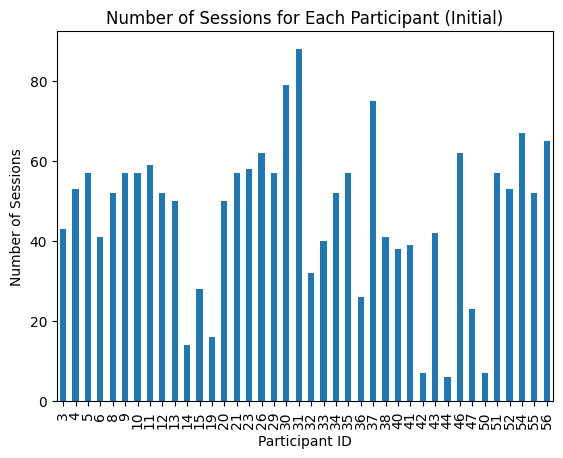

Filtered data (participants with at least 30 sessions, showing only the first 5 rows):


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,eye_gaze.rx,eye_gaze.ry,eye_gaze.rz,head_gaze.rx,...,skeleton.wrist_left.z,skeleton.wrist_right.confidence,skeleton.wrist_right.x,skeleton.wrist_right.y,skeleton.wrist_right.z,task.ability,task.difficultyLevel,task.end,task.index,task.start
1589,1,1.495034e+09,25.170000,62,1,3,0.037951,-0.360349,-0.608722,0.050054,...,910.574562,0.916495,101.534769,-570.809708,941.627993,2,1,9712,36,0
1576,1,1.493117e+09,24.680000,62,1,3,0.032943,-0.236280,-0.705289,0.026196,...,823.905889,0.823167,277.025347,-448.194920,836.349568,0,1,5033,25,166
1577,1,1.489653e+09,25.144756,62,1,3,0.031548,-0.274107,-0.739086,0.018012,...,945.837601,0.909415,-13.495078,-543.343481,850.373206,0,1,4769,2,86
1578,1,1.490691e+09,25.170000,62,1,3,-0.029270,-0.332423,-0.544279,-0.023801,...,866.474388,0.761778,145.898120,-450.722892,774.676489,2,0,17979,13,0
1579,1,1.491296e+09,25.170000,62,1,3,0.190826,-0.462091,-0.728052,0.245099,...,909.424226,0.944821,120.820247,-510.833737,852.575270,2,0,12704,17,21


Count of participants with at least 30 sessions: 32
Count of sessions for each participant in the filtered data:
participant.id
3     30
4     30
5     30
6     30
8     30
9     30
10    30
11    30
12    30
13    30
20    30
21    30
23    30
26    30
29    30
30    30
31    30
32    30
33    30
34    30
35    30
37    30
38    30
40    30
41    30
43    30
46    30
51    30
52    30
54    30
55    30
56    30
Name: count, dtype: int64


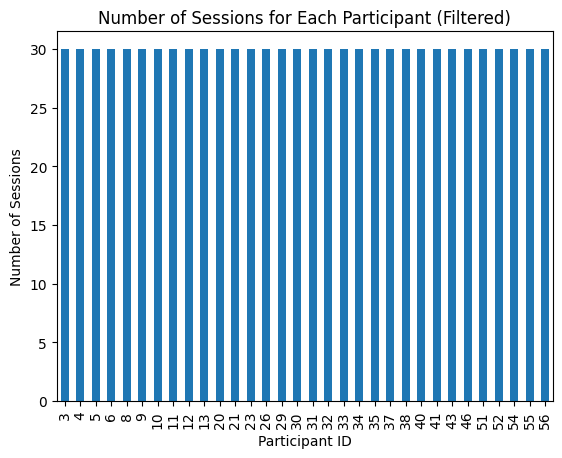

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('autismfile.csv')

# List of columns to be label encoded
categorical_columns = ['condition', 'participant.gender', 'task.ability', 'task.difficultyLevel']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the count of initial participants
initial_participant_count = data['participant.id'].nunique()
print(f"Initial count of participants: {initial_participant_count}")

# Display a graph of the number of sessions for each participant
session_counts = data['participant.id'].value_counts().sort_index()
print("Count of sessions for each participant:")
print(session_counts)

fig, ax = plt.subplots()
session_counts.plot(kind='bar', ax=ax)
ax.set_title('Number of Sessions for Each Participant (Initial)')
ax.set_xlabel('Participant ID')
ax.set_ylabel('Number of Sessions')
plt.show()

# Filter participants with at least 30 sessions
eligible_participants = session_counts[session_counts >= 30].index
filtered_data = data[data['participant.id'].isin(eligible_participants)]

# Keep only the first 30 sessions for each participant
filtered_data = filtered_data.groupby('participant.id').head(30)

# Sort the DataFrame by participant ID
filtered_data = filtered_data.sort_values(by='participant.id')

# Display the filtered table with the first 5 rows
print("Filtered data (participants with at least 30 sessions, showing only the first 5 rows):")
display(filtered_data.head())

# Display the count of participants after filtering
filtered_participant_count = filtered_data['participant.id'].nunique()
print(f"Count of participants with at least 30 sessions: {filtered_participant_count}")

# Display a graph of the number of sessions for each participant in the filtered data
filtered_session_counts = filtered_data['participant.id'].value_counts().sort_index()
print("Count of sessions for each participant in the filtered data:")
print(filtered_session_counts)

fig, ax = plt.subplots()
filtered_session_counts.plot(kind='bar', ax=ax)
ax.set_title('Number of Sessions for Each Participant (Filtered)')
ax.set_xlabel('Participant ID')
ax.set_ylabel('Number of Sessions')
plt.show()

# Save the filtered DataFrame to a CSV file in the order of participant ID
filtered_data.to_csv('filtered_autismfile.csv', index=False)


# Combining metrics using euclidean formula

In [2]:
import numpy as np

# Function to calculate combined gaze metric
def calculate_combined_gaze_metric(row, gaze):
    return np.sqrt(row[f'{gaze}.rx']**2 + row[f'{gaze}.ry']**2 + row[f'{gaze}.rz']**2)

# Calculate combined eye gaze metric for each row
data['combined_eye_gaze'] = data.apply(calculate_combined_gaze_metric, axis=1, gaze='eye_gaze')

# Calculate combined head gaze metric for each row
data['combined_head_gaze'] = data.apply(calculate_combined_gaze_metric, axis=1, gaze='head_gaze')

# Function to calculate combined movement metric
def calculate_combined_movement(row, body_part):
    combined_metric = np.sqrt(row[f'skeleton.{body_part}.x']**2 + row[f'skeleton.{body_part}.y']**2 + row[f'skeleton.{body_part}.z']**2)
    return combined_metric

# List of body parts to calculate combined metrics for
body_parts = ['elbow_left', 'elbow_right', 'hand_left', 'hand_right', 'head', 'sholder_center', 'sholder_left', 'sholder_right', 'wrist_left', 'wrist_right']

# Calculate combined movement metric for each body part
for part in body_parts:
    column_name = f'combined_{part}_movement'
    data[column_name] = data.apply(calculate_combined_movement, axis=1, body_part=part)
    
# Save the DataFrame with the new combined metrics to a new CSV file
output_file_path = 'combined_metrics_autism.csv'
data.to_csv(output_file_path, index=False)

print(f"Combined metrics saved to {output_file_path}")


Combined metrics saved to combined_metrics_autism.csv


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('combined_metrics_autism.csv')

# List of columns to be deleted
columns_to_delete = ['eye_gaze.rx', 'eye_gaze.ry','eye_gaze.rz','head_gaze.rx','head_gaze.ry','head_gaze.rz',
                    'skeleton.elbow_left.x','skeleton.elbow_left.y','skeleton.elbow_left.z',
                    'skeleton.elbow_right.x','skeleton.elbow_right.y','skeleton.elbow_right.z',
                    'skeleton.hand_left.x','skeleton.hand_left.y','skeleton.hand_left.z',
                    'skeleton.hand_right.x','skeleton.hand_right.y','skeleton.hand_right.z',
                    'skeleton.head.x','skeleton.head.y','skeleton.head.z',
                    'skeleton.sholder_center.x','skeleton.sholder_center.y','skeleton.sholder_center.z',
                    'skeleton.sholder_left.x','skeleton.sholder_left.y','skeleton.sholder_left.z',
                    'skeleton.sholder_right.x','skeleton.sholder_right.y','skeleton.sholder_right.z',
                    'skeleton.wrist_left.x','skeleton.wrist_left.y','skeleton.wrist_left.z',
                    'skeleton.wrist_right.x','skeleton.wrist_right.y','skeleton.wrist_right.z']

# Drop the specified columns
df.drop(columns=columns_to_delete, inplace=True)

# Dictionary of columns to be renamed: {old_name: new_name}
columns_to_rename = {
    'combined_head_gaze': 'head_gaze',
    'combined_eye_gaze': 'eye_gaze',
    'combined_elbow_left_movement': 'elbow_left',
    'combined_elbow_right_movement': 'elbow_right',
    'combined_hand_left_movement':'hand_left',
    'combined_hand_right_movement':'hand_right',
    'combined_head_movement':'head',
    'combined_sholder_center_movement':'sholder_center',
    'combined_sholder_left_movement':'sholder_left',
    'combined_sholder_right_movement':'sholder_right',
    'combined_wrist_left_movement':'wrist_left',
    'combined_wrist_right_movement':'wrist_right',
    'skeleton.elbow_left.confidence':'elbow_left.confidence',
    'skeleton.elbow_right.confidence':'elbow_right.confidence',
    'skeleton.hand_left.confidence':'hand_left.confidence',
    'skeleton.hand_right.confidence':'hand_right.confidence',
    'skeleton.head.confidence':'head.confidence',
    'skeleton.sholder_center.confidence':'sholder_center.confidence',
    'skeleton.sholder_left.confidence': 'sholder_left.confidence',
    'skeleton.sholder_right.confidence': 'sholder_right.confidence',
    'skeleton.wrist_left.confidence': 'wrist_left.confidence',
    'skeleton.wrist_right.confidence': 'wrist_right.confidence'
    
    
}

# Rename the specified columns
df.rename(columns=columns_to_rename, inplace=True)

# Save the resulting DataFrame to a new CSV file
df.to_csv('output.csv', index=False)


In [4]:
import pandas as pd

# Load the filtered dataset (replace 'filtered_autism.csv' with your actual file path)
data = pd.read_csv('output.csv')

# Group data by participant ID
grouped_data = data.groupby('participant.id')

# Print the contents of grouped data
for participant_id, group_data in grouped_data:
    print(f"Participant ID: {participant_id}")
    display(group_data)
    print("\n")


Participant ID: 3


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1574,1,1.491295e+09,25.150000,62,1,3,0.907264,0.862951,0.634765,0.696437,...,988.115232,973.180871,919.362779,917.928399,905.997259,926.919570,995.736176,975.248642,940.211177,935.464927
1575,1,1.493115e+09,25.160000,62,1,3,0.979270,0.848811,0.426755,0.425373,...,1061.141333,1115.045659,1019.201489,1044.028662,996.050237,1053.388480,1078.389433,1115.072136,1029.025146,1060.264421
1576,1,1.493117e+09,24.680000,62,1,3,0.857143,0.645539,0.570038,0.523147,...,1033.248126,1020.098458,948.257271,980.565341,959.148679,1020.280823,1026.429747,1036.255321,967.301847,988.484865
1577,1,1.489653e+09,25.144756,62,1,3,0.825330,0.922416,0.361082,0.674984,...,1208.674712,1072.678014,1075.667443,975.014745,1004.976676,1144.136531,1220.116157,1144.028426,1101.999145,1009.226856
1578,1,1.490691e+09,25.170000,62,1,3,0.795984,0.809889,0.456255,0.597030,...,1038.704976,958.033542,982.268163,891.646797,922.183463,948.780624,1021.572328,973.091790,993.537884,908.053439
1579,1,1.491296e+09,25.170000,62,1,3,0.903023,0.977802,0.671836,0.796285,...,1148.667031,1083.002944,1037.852012,974.774565,1011.970094,1047.761096,1128.218248,1100.558205,1063.665400,1001.215876
1580,1,1.493115e+09,25.170000,62,1,3,0.954239,0.816204,0.489122,0.586834,...,1051.507176,1078.359586,988.167961,1006.844111,984.866481,1024.227766,1057.712266,1083.476985,1004.034162,1022.977002
1581,1,1.493115e+09,25.170000,62,1,3,0.936013,0.969453,0.546945,0.716238,...,1079.188172,1125.097412,1016.987364,1025.757602,1008.231566,1068.721420,1096.671140,1126.378995,1031.389015,1045.278340
1582,1,1.491297e+09,25.140000,62,1,3,0.956372,0.975316,0.700918,0.722732,...,1063.957166,1050.545846,1016.011062,978.956867,991.987380,1018.911555,1068.480091,1073.527981,1023.164242,996.311220
1583,1,1.490690e+09,25.170000,62,1,3,0.976619,0.974964,0.712412,0.862101,...,1139.829185,1113.251689,1041.363588,998.746820,1014.548415,1055.879919,1133.845589,1123.627992,1062.539025,1029.432995




Participant ID: 4


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
725,0,1.489759e+09,25.17,71,1,4,0.914384,0.970477,0.870920,0.745613,...,1133.100611,1125.129749,1076.642773,1100.467606,963.218905,1018.203591,1092.043675,1090.372875,1096.035120,1113.370472
726,0,1.491999e+09,25.17,71,1,4,0.931490,0.951296,0.769022,0.734009,...,1159.685185,1155.979429,1145.247599,1142.985255,1013.357398,1084.129435,1129.237496,1130.417143,1150.738582,1152.203749
727,0,1.491997e+09,25.17,71,1,4,0.962490,0.977114,0.808498,0.772989,...,1139.058315,1116.887903,1124.442044,1117.449483,981.084635,1051.774154,1110.432261,1093.411529,1135.074847,1118.188632
728,0,1.492602e+09,25.17,71,1,4,0.905205,0.951979,0.711013,0.866481,...,1137.541702,1150.624407,1133.082071,1087.766795,990.670936,1059.309732,1107.465531,1110.383287,1132.080992,1106.565618
729,0,1.491998e+09,25.16,71,1,4,0.978565,0.874367,0.963382,0.678178,...,1153.552069,1100.317731,1077.198817,1063.256805,983.924760,1057.725916,1112.578848,1084.434298,1097.465535,1079.341385
730,0,1.491999e+09,25.18,71,1,4,0.966594,0.946685,0.829425,0.743040,...,1139.085769,1149.923759,1100.646146,1114.415969,990.212706,1058.051828,1103.478253,1114.581731,1111.540298,1133.289460
731,0,1.492601e+09,25.17,71,1,4,0.762648,0.897336,0.398950,0.389666,...,964.781765,965.444978,896.300467,925.620818,882.971787,933.804451,978.015985,974.848560,916.423648,937.553079
732,0,1.490370e+09,25.17,71,1,4,0.904498,0.964264,0.864140,0.842884,...,1121.321579,1089.381156,1115.125751,1070.960110,990.143586,1020.914501,1090.657762,1081.078866,1114.389076,1083.867467
733,0,1.490370e+09,25.17,71,1,4,0.693818,0.723802,0.583153,0.224266,...,1017.595767,1021.238643,922.727053,985.709517,920.555581,967.010693,1014.828992,1012.208752,952.367935,992.620952
734,0,1.489759e+09,25.17,71,1,4,0.953433,0.956167,0.643546,0.774812,...,1135.353135,1149.865193,1108.172685,1134.153671,980.577129,1017.839031,1095.526593,1104.222209,1113.296566,1142.684974




Participant ID: 5


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
778,0,1.490891e+09,25.17,62,1,5,0.907898,0.867408,0.774416,0.743715,...,1066.845386,1071.232168,1019.099570,1007.106331,938.199413,1022.761537,1055.850206,1058.400821,1031.523299,1024.564853
779,0,1.490291e+09,25.17,62,1,5,0.528202,0.621052,0.414353,0.588598,...,779.029225,794.597797,745.424131,740.499380,696.103466,739.745285,785.895898,791.034414,750.535721,754.701174
780,0,1.490290e+09,24.82,62,1,5,0.697668,0.630207,0.557637,0.490307,...,874.729094,907.592600,797.840276,896.512482,794.591145,857.016536,874.659824,897.616090,818.602243,900.171586
781,0,1.490289e+09,25.17,62,1,5,0.846756,0.766273,0.593387,0.604581,...,965.397113,1033.837271,906.216741,984.318029,911.571653,962.724050,983.246760,1030.941588,922.869283,996.326914
782,0,1.490891e+09,25.17,62,1,5,0.885253,0.912669,0.780787,0.802675,...,1050.892736,1057.963395,990.216914,1011.995563,904.104133,986.813727,1029.792774,1036.239240,1005.953989,1022.912197
783,0,1.493136e+09,25.17,62,1,5,0.947521,0.956040,0.840177,0.841540,...,1060.634557,1047.558183,1017.964061,991.884517,921.672740,1007.283584,1044.735623,1033.218172,1028.228003,1003.825006
784,0,1.490719e+09,24.98,62,1,5,0.742666,0.678283,0.717070,0.609175,...,920.675291,928.738488,904.341840,912.937330,804.358710,863.109690,901.519287,913.444842,910.152566,917.367148
785,0,1.493136e+09,25.17,62,1,5,0.969476,0.990966,0.904044,0.865977,...,1116.720858,1066.692831,1055.902450,987.303998,927.857147,1034.484733,1087.072315,1048.879998,1070.424698,1003.789225
786,0,1.490892e+09,25.17,62,1,5,0.873786,0.851591,0.738861,0.724121,...,1000.580810,986.138197,975.130815,945.801424,842.181824,912.949067,975.409797,967.714598,980.256850,954.294745
787,0,1.493137e+09,25.17,62,1,5,0.818712,0.823614,0.648158,0.782792,...,1056.267688,1076.203053,998.344476,1015.598731,939.557347,1019.104278,1042.814572,1068.037053,1011.612877,1030.018080




Participant ID: 6


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1617,1,1.490285e+09,25.17,53,1,6,0.960813,0.971940,0.926463,0.868892,...,1189.610830,1135.891938,1106.513681,1041.601210,1066.517685,1140.814896,1194.225760,1156.125081,1134.739250,1057.823761
1618,1,1.490286e+09,25.17,53,1,6,0.903907,0.986728,0.886483,0.620746,...,1215.121804,1145.622175,1128.706593,1085.883157,1050.279078,1086.419394,1196.904778,1147.492511,1162.977286,1099.746434
1619,1,1.490112e+09,25.17,53,1,6,0.985775,0.987672,0.980085,0.964912,...,1087.462048,1117.197555,999.868077,1015.040281,1038.581606,1025.651091,1126.455456,1139.692056,1025.297743,1040.230933
1620,1,1.490112e+09,25.17,53,1,6,0.907780,0.900615,0.645816,0.747038,...,1000.116048,1008.499453,965.011784,934.648596,864.639172,862.530981,982.190569,993.155874,976.828923,952.915285
1621,1,1.490113e+09,25.17,53,1,6,0.947297,0.853301,0.501222,0.635968,...,1091.851896,1101.888069,1029.037410,1046.608399,979.534362,963.708509,1091.130293,1090.636900,1050.829545,1062.534241
1622,1,1.490114e+09,25.15,53,1,6,0.954350,0.568084,0.710105,0.390168,...,1007.449724,968.072095,957.119471,901.866928,872.722184,858.538923,977.697152,952.267280,970.171790,920.265630
1623,1,1.489511e+09,25.17,53,1,6,0.963040,0.989203,0.939369,0.903239,...,1146.741542,1119.335109,1075.448467,1054.639014,980.338343,982.382090,1125.539602,1100.234605,1095.830470,1070.762679
1624,1,1.490113e+09,25.17,53,1,6,0.979441,0.977243,0.896496,0.820016,...,1084.447503,1088.342159,1067.260847,1009.689764,958.378070,964.739939,1068.451494,1089.855429,1073.655340,1032.162291
1625,1,1.490895e+09,25.17,53,1,6,0.973431,0.943982,0.587708,0.313380,...,1132.712741,1112.370745,1002.044387,994.589090,1066.814081,1138.888618,1178.631329,1148.845925,1033.214546,1021.022177
1626,1,1.489511e+09,25.17,53,1,6,0.990108,0.990183,0.866873,0.922223,...,1159.010883,1143.180279,1078.487380,1054.885842,1028.892298,1032.691392,1148.367473,1147.424156,1098.048904,1080.607292




Participant ID: 8


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1658,1,1.491836e+09,25.17,60,1,8,0.840337,0.982109,0.831288,0.585708,...,1034.476636,1028.496207,1033.918128,952.342164,952.815999,1003.852797,1054.890495,1042.361956,1032.802390,971.479898
1659,1,1.491837e+09,25.17,60,1,8,0.942689,0.895554,0.772630,0.689877,...,1024.045631,1038.502704,949.646504,974.964502,948.335438,999.723571,1035.653996,1043.886097,970.251454,995.326299
1660,1,1.490970e+09,25.03,60,1,8,0.574488,0.429463,0.527082,0.376962,...,1178.598967,1147.726002,1071.066536,1043.938434,1183.364777,1237.560555,1230.020422,1198.566337,1103.765975,1074.097533
1661,1,1.490022e+09,25.16,60,1,8,0.656230,0.676936,0.418365,0.401636,...,879.810053,840.338911,829.475925,819.819920,806.363113,844.221332,880.533373,845.450440,844.315415,825.157841
1662,1,1.491838e+09,25.16,60,1,8,0.894461,0.680433,0.464110,0.477221,...,967.217565,1017.573981,897.526562,971.169568,930.069876,970.269750,984.032360,1008.958688,915.466125,983.147487
1663,1,1.491838e+09,25.17,60,1,8,0.959150,0.929697,0.552801,0.482942,...,1037.220131,998.538652,969.183947,942.479553,938.907886,985.680524,1049.620976,1023.770829,988.425129,954.991531
1664,1,1.492783e+09,25.17,60,1,8,0.983986,0.982490,0.441355,0.624197,...,1054.623302,1071.516975,1041.866455,985.336394,972.411269,1015.001332,1072.597688,1077.649731,1044.768115,1007.761709
1665,1,1.491837e+09,25.17,60,1,8,0.869608,0.758211,0.663237,0.578750,...,1020.290660,1000.845179,944.374397,944.023303,943.673076,995.176027,1038.173567,1027.405506,963.410462,957.155405
1666,1,1.490971e+09,25.17,60,1,8,0.674186,0.670194,0.508684,0.507686,...,800.901193,799.156020,781.758787,762.502938,713.255940,755.411551,797.814916,800.497343,788.070112,773.735297
1667,1,1.490971e+09,25.17,60,1,8,0.866478,0.817952,0.504466,0.603602,...,941.632489,947.472700,917.357396,879.664995,860.959436,910.326890,945.293381,952.887523,924.672331,902.250307




Participant ID: 9


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
835,0,1.490371e+09,25.18,60,1,9,0.801724,0.732759,0.548522,0.368473,...,893.378111,880.208184,808.365687,841.288730,771.382841,841.207173,881.873469,855.280852,825.312541,852.852556
836,0,1.490373e+09,25.16,60,1,9,0.818124,0.881783,0.327732,0.290527,...,1186.714406,1124.601715,1149.693861,1087.174186,1034.674988,1074.837653,1169.132492,1126.631127,1159.825268,1096.530320
837,0,1.490025e+09,25.17,60,1,9,0.945635,0.916236,0.628453,0.407298,...,1133.384301,1112.260944,1026.314244,1016.177950,1026.713625,1099.574794,1141.147162,1115.748235,1050.327179,1033.346242
838,0,1.490028e+09,25.17,60,1,9,0.541764,0.688689,0.442768,0.443502,...,886.322615,835.646376,842.856141,806.482420,767.366720,798.514041,868.458251,828.542822,852.502558,813.780798
839,0,1.489421e+09,25.17,60,1,9,0.850688,0.817241,0.691675,0.316733,...,953.714047,945.661040,903.347482,886.551762,831.863593,897.618759,930.058605,928.054259,918.692037,899.247405
840,0,1.490026e+09,25.17,60,1,9,0.915472,0.920569,0.478830,0.543843,...,1200.767047,1176.620378,1153.578407,1101.539304,1056.398404,1094.821884,1175.961929,1168.705533,1164.901684,1126.258443
841,0,1.490372e+09,25.17,60,1,9,0.882781,0.826215,0.683553,0.533621,...,1070.989474,1065.524794,995.554858,982.252994,951.914290,1031.421955,1065.103690,1058.833295,1014.567509,1003.920184
842,0,1.490026e+09,25.17,60,1,9,0.984900,0.984413,0.945608,0.863289,...,1217.170704,1237.323472,1111.056301,1210.665901,1089.436958,1128.489004,1202.541313,1217.797643,1143.639234,1205.247276
843,0,1.489165e+09,25.17,60,1,9,0.960396,0.988243,0.945080,0.794245,...,1100.904570,1076.027825,1059.534988,997.201702,924.757828,977.561400,1068.176514,1051.684502,1071.095158,1020.274042
844,0,1.490026e+09,25.17,60,1,9,0.756723,0.944207,0.295049,0.677557,...,1189.634825,1131.479739,1157.773433,1101.548422,1042.802913,1089.401962,1157.412905,1120.855351,1169.667864,1108.638049




Participant ID: 10


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
892,0,1.494413e+09,24.59,66,1,10,0.750832,0.745861,0.602948,0.559201,...,915.540284,926.296147,846.500372,862.098519,841.639234,890.104727,926.524800,930.097721,864.576488,879.416501
893,0,1.494413e+09,24.95,66,1,10,0.458021,0.479605,0.393086,0.401500,...,648.393604,579.736663,594.210524,550.095238,547.821252,602.900300,641.301508,591.554336,607.813409,560.243047
894,0,1.494588e+09,25.17,66,1,10,0.393610,0.444117,0.336952,0.227047,...,589.118787,606.585208,554.287878,588.165530,574.428418,603.119437,596.622499,612.823664,565.632412,592.704631
895,0,1.494848e+09,25.17,66,1,10,0.397055,0.397055,0.367006,0.367092,...,488.133427,493.215252,456.098780,456.683732,459.669371,463.997816,488.670618,485.033043,466.065472,468.107540
896,0,1.494587e+09,25.13,66,1,10,0.945247,0.923194,0.545247,0.703422,...,1048.389650,1019.118509,991.651756,947.120068,937.793873,952.672222,1036.990515,1016.889448,1003.856952,971.125922
897,0,1.494241e+09,25.16,66,1,10,0.818165,0.848689,0.731648,0.661985,...,990.067788,965.150938,942.730627,905.889818,875.875644,935.014437,981.625304,971.915457,956.735234,922.633290
898,0,1.494848e+09,25.17,66,1,10,0.929220,0.943317,0.788133,0.766840,...,1083.640641,1025.466199,1000.814823,954.172100,947.680731,947.594184,1064.109958,1024.982496,1027.009439,974.556295
899,0,1.494587e+09,25.17,66,1,10,0.734408,0.715336,0.533718,0.564632,...,834.858488,820.339928,774.316553,756.240573,761.503693,779.032431,836.286656,831.831322,791.382942,774.437315
900,0,1.494240e+09,25.13,66,1,10,0.712289,0.707862,0.652733,0.631903,...,931.203516,905.008113,865.868404,834.309861,825.817366,878.928174,925.969599,914.052697,884.541411,854.139248
901,0,1.494846e+09,25.16,66,1,10,0.485385,0.454371,0.385207,0.437766,...,643.950376,639.792354,565.769623,588.111203,607.348872,636.110837,655.827550,650.414394,590.078884,603.372860




Participant ID: 11


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1710,1,1.489396e+09,25.13,53,1,11,0.463139,0.486638,0.327422,0.308124,...,653.199022,627.119460,611.281843,587.809028,612.038801,644.873663,663.041486,645.983468,621.226682,597.593458
1711,1,1.490175e+09,25.17,53,1,11,0.591357,0.682819,0.625760,0.597441,...,930.175865,951.150295,900.277101,896.100608,956.079896,969.856187,964.929105,974.754583,910.466481,908.108488
1712,1,1.490606e+09,11.58,53,1,11,0.441722,0.433026,0.319122,0.257291,...,590.507844,571.236387,551.422267,541.395246,542.922965,581.037324,587.203930,590.610605,560.328103,549.849269
1713,1,1.490607e+09,25.17,53,1,11,0.364773,0.421733,0.279687,0.305682,...,508.964821,489.629156,475.828643,467.670080,427.780629,481.545685,493.363824,481.856992,487.095325,474.312159
1714,1,1.490174e+09,25.17,53,1,11,0.985980,0.970857,0.693762,0.791745,...,1234.752078,1247.654504,1147.968926,1110.087237,1081.188297,1185.595369,1209.365619,1212.092267,1169.636725,1144.228567
1715,1,1.490176e+09,25.18,53,1,11,0.944859,0.946766,0.849674,0.782616,...,1256.227832,1232.513538,1178.165893,1092.221442,1101.899642,1204.606665,1220.097071,1224.667643,1194.723582,1128.140462
1716,1,1.490608e+09,25.17,53,1,11,0.860568,0.876588,0.583250,0.665120,...,1187.211422,1138.074032,1146.550008,1065.780510,1076.501908,1144.227635,1178.707755,1147.349955,1156.057167,1082.570830
1717,1,1.490607e+09,25.16,53,1,11,0.918964,0.840252,0.531717,0.517768,...,1196.304107,1179.890089,1135.800611,1131.856201,1018.504804,1145.034306,1170.659769,1158.532847,1151.566703,1148.183028
1718,1,1.490175e+09,25.15,53,1,11,0.360725,0.366037,0.251226,0.235087,...,530.615970,543.994383,494.620487,507.499816,504.192705,530.315253,529.526837,541.047967,505.459977,518.060804
1719,1,1.491212e+09,25.17,53,1,11,0.740657,0.870220,0.474553,0.665261,...,1156.095167,1121.891810,1099.075112,1066.784801,1077.021959,1128.186253,1164.105406,1130.992933,1113.341270,1081.536998




Participant ID: 12


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1769,1,1.489414e+09,25.17,57,1,12,0.995546,0.992850,0.714018,0.847339,...,1138.564119,1063.057779,1051.308096,957.972599,1031.154632,1047.397354,1137.857619,1100.400968,1070.094705,980.066326
1770,1,1.490019e+09,25.12,57,1,12,0.677405,0.634982,0.483893,0.436252,...,1134.612429,1119.940206,1094.355145,1024.390609,1064.978424,1102.713061,1141.583791,1136.991776,1104.474786,1049.243948
1771,1,1.490018e+09,25.16,57,1,12,0.972181,0.986256,0.853784,0.765855,...,1132.725267,1089.429825,1071.128202,1001.597933,961.393164,969.545454,1104.331974,1080.821344,1077.059075,1019.771917
1772,1,1.490020e+09,25.17,57,1,12,0.904125,0.980744,0.879903,0.646701,...,1185.184888,1112.199873,1097.514182,1044.083386,997.636199,1002.094273,1134.837664,1103.697983,1110.117293,1062.011571
1773,1,1.490019e+09,25.15,57,1,12,0.798505,0.952226,0.756256,0.463113,...,1172.597864,1134.380252,1105.991817,1066.607741,972.698436,978.078709,1109.037417,1096.699936,1119.860717,1082.819840
1774,1,1.489600e+09,25.17,57,1,12,0.753106,0.626863,0.541925,0.393168,...,923.816403,905.769644,876.985865,835.157184,838.813936,866.952023,919.773360,906.813647,890.477472,850.967804
1775,1,1.490019e+09,25.16,57,1,12,0.847400,0.905087,0.854220,0.447855,...,1136.241486,1081.367689,1068.159566,1042.020798,949.031394,957.533679,1080.477711,1055.663611,1073.458600,1051.377340
1776,1,1.490201e+09,25.17,57,1,12,0.471996,0.565839,0.361668,0.434062,...,722.929003,671.497771,719.057645,622.400406,651.198749,659.797527,706.968270,700.690716,719.714196,632.959401
1777,1,1.490626e+09,25.17,57,1,12,0.921063,0.981843,0.683486,0.666284,...,1159.410446,1130.066193,1090.309944,1073.948997,1020.993350,1043.256278,1140.529402,1119.498097,1103.051049,1088.925204
1778,1,1.490624e+09,25.17,57,1,12,0.966841,0.954159,0.280512,0.638511,...,1120.133580,1089.914811,1186.766636,1085.620726,968.598838,975.517529,1101.758485,1091.771503,1171.759747,1082.897512




Participant ID: 13


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1821,1,1.490614e+09,25.14,53,1,13,0.500267,0.455305,0.380132,0.378532,...,738.878464,748.987893,694.222896,691.262516,710.247147,756.537165,745.230343,804.777044,703.869278,703.874123
1822,1,1.490614e+09,25.16,53,1,13,0.400000,0.395297,0.308437,0.283817,...,611.990088,578.005164,578.261022,547.878086,587.010482,602.352413,623.457992,596.926650,585.751809,557.041901
1823,1,1.490958e+09,25.17,53,1,13,0.727867,0.766755,0.498262,0.530697,...,964.826163,955.762550,923.774911,892.688228,932.486992,958.813490,979.893090,990.014213,933.734071,909.711527
1824,1,1.490958e+09,25.18,53,1,13,0.977688,0.947769,0.649594,0.716024,...,1055.773317,1012.612981,1064.820007,895.052362,956.211497,977.147363,1064.729843,1039.266483,1066.814185,920.983856
1825,1,1.490354e+09,25.16,53,1,13,0.918255,0.903891,0.651867,0.501698,...,1008.190129,996.490567,961.025001,911.329620,897.986681,933.145868,997.718836,989.377671,971.479444,931.129166
1826,1,1.491565e+09,25.17,53,1,13,0.863846,0.972141,0.879765,0.780792,...,1145.224565,1096.292629,1074.916092,1018.681047,974.182789,1003.869519,1121.671062,1087.214622,1083.071119,1038.228580
1827,1,1.490354e+09,25.08,53,1,13,0.736522,0.712604,0.449431,0.488383,...,877.536150,857.637923,836.558361,798.329582,811.627134,846.109219,873.777078,886.775014,846.087181,812.230881
1828,1,1.490959e+09,25.17,53,1,13,0.824456,0.858715,0.415354,0.539385,...,1030.504337,1066.308800,956.937235,1009.726164,1167.874412,1166.340156,1095.265381,1087.739073,972.616160,1025.326206
1829,1,1.491219e+09,25.16,53,1,13,0.470822,0.450303,0.337783,0.249641,...,540.120225,534.480265,493.841762,509.470551,484.054320,524.807795,541.965951,538.708512,504.985853,514.522767
1830,1,1.490960e+09,25.17,53,1,13,0.544080,0.561508,0.417944,0.438546,...,789.107705,797.993790,731.592784,722.859315,782.545629,832.961368,834.852910,846.111934,748.772464,746.860321




Participant ID: 14


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1394,1,1.490711e+09,25.14,50,1,14,0.335461,0.585160,0.394845,0.379306,...,783.036051,759.958297,712.023815,717.978006,795.372101,793.066477,810.566280,777.304144,737.396477,729.083430
1395,1,1.491486e+09,19.65,50,1,14,0.265723,0.267021,0.272094,0.235398,...,413.805694,397.954866,411.931882,390.172194,384.213898,408.279860,412.481821,413.568974,413.262040,392.370455
1396,1,1.490712e+09,25.18,50,1,14,0.464316,0.442415,0.227549,0.317182,...,685.644701,677.153851,650.690815,641.026844,667.149830,681.267369,695.782721,689.220552,661.312005,653.199279
1397,1,1.491485e+09,25.15,50,1,14,0.697332,0.752357,0.519623,0.469145,...,900.019425,883.969644,861.736711,817.185671,799.114397,847.435749,903.703790,896.926513,875.852367,835.994722
1398,1,1.490105e+09,9.27,50,1,14,0.814992,0.723838,0.537235,0.602748,...,1148.290502,1105.509033,1083.497270,1054.101199,1031.825831,1077.342915,1143.985452,1127.070637,1100.988494,1066.645096
1399,1,1.491483e+09,25.17,50,1,14,0.815332,0.903549,0.493254,0.660417,...,987.426161,978.307839,938.232942,899.521831,884.865551,930.337516,992.199403,988.473974,951.559180,917.534745
1400,1,1.490710e+09,25.17,50,1,14,0.695656,0.884041,0.669460,0.626890,...,967.655766,955.545720,982.479811,883.263344,846.707502,899.035421,956.527562,954.489994,976.758500,898.485876
1401,1,1.490710e+09,25.17,50,1,14,0.525156,0.503782,0.364189,0.330977,...,566.142295,558.465248,512.921558,544.803100,527.327418,564.702913,577.918365,579.545620,525.669796,547.153621
1402,1,1.490274e+09,25.17,50,1,14,0.413759,0.448156,0.290327,0.330188,...,639.988693,645.467408,607.006065,616.086429,617.195763,646.133685,660.040675,660.959008,617.568822,626.999166
1403,1,1.490106e+09,25.17,50,1,14,0.288949,0.315170,0.204662,0.222492,...,508.493498,509.165978,491.257320,485.570712,495.812115,515.629715,518.212548,519.437905,496.653271,492.365372




Participant ID: 15


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1408,1,1.490264e+09,25.17,45,1,15,0.276149,0.295667,0.248694,0.272770,...,391.660658,383.356881,374.574719,352.264611,362.709737,370.532941,396.755495,390.453400,378.181984,359.719665
1409,1,1.490869e+09,25.17,45,1,15,0.936437,0.941064,0.844426,0.805363,...,1100.340442,1132.023587,1013.731524,1044.729817,999.258405,1031.364591,1092.665038,1123.368810,1029.072849,1068.070717
1410,1,1.490870e+09,25.16,45,1,15,0.885357,0.771728,0.807913,0.577951,...,1053.534017,1036.471865,1044.328892,970.044824,971.786520,980.978732,1046.737627,1035.228287,1047.102336,985.327396
1411,1,1.490870e+09,25.17,45,1,15,0.783543,0.828486,0.642653,0.693765,...,926.808647,933.329932,901.856873,865.723904,851.291485,861.715356,922.980013,933.113125,907.450757,883.244952
1412,1,1.489400e+09,25.17,45,1,15,0.438608,0.418629,0.360903,0.362690,...,672.592916,682.749807,639.727880,666.930439,661.295434,658.363062,679.776766,691.882912,647.341952,669.827571
1413,1,1.491216e+09,25.17,45,1,15,0.940579,0.766712,0.802031,0.695164,...,1091.981364,1094.992099,993.515618,1018.477654,988.157297,1028.770982,1081.835318,1094.006934,1018.015172,1034.197710
1414,1,1.491215e+09,25.14,45,1,15,0.827477,0.316176,0.315908,0.226406,...,837.369980,861.330762,792.340992,874.547051,877.030997,920.919711,895.496976,899.101870,808.436866,870.823381
1415,1,1.489402e+09,25.17,45,1,15,0.848566,0.922398,0.856473,0.625598,...,1121.555571,1120.176216,1039.982449,1037.614765,1024.621773,1032.945098,1123.253669,1122.181069,1061.249079,1056.480923
1416,1,1.496918e+09,25.17,45,1,15,0.795937,0.775165,0.522940,0.575668,...,1061.175200,1035.886556,941.039589,947.099658,1066.717820,1103.545629,1126.577816,1094.033520,987.609961,969.259554
1417,1,1.498473e+09,25.17,45,1,15,0.766166,0.766716,0.726049,0.602766,...,1035.440939,1084.706110,891.335720,940.823540,1104.784599,1145.892579,1106.366795,1179.759859,951.542682,987.309165




Participant ID: 19


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
396,0,1.491308e+09,25.16,47,1,19,0.518771,0.846786,0.341154,0.742374,...,1044.219669,1038.547012,974.176912,945.735033,915.905952,976.898166,1054.301757,1035.848798,990.755338,969.817692
397,0,1.492688e+09,25.11,47,1,19,0.886859,0.790566,0.641780,0.683632,...,1052.915608,1019.640174,958.654905,924.798560,951.171901,1024.185322,1062.204164,1056.913379,980.922135,950.332795
398,0,1.492686e+09,25.14,47,1,19,0.688410,0.718137,0.524612,0.524010,...,1220.294498,1210.920140,1111.731333,1131.201099,1156.790576,1211.182660,1238.860984,1221.771568,1147.353507,1152.591194
399,0,1.491478e+09,25.17,47,1,19,0.680889,0.785118,0.415756,0.608919,...,1013.792250,942.886175,957.745578,901.963794,931.154886,990.332361,1028.330389,967.354442,972.781827,910.839351
400,0,1.491477e+09,25.07,47,1,19,0.854314,0.922335,0.582401,0.637334,...,1155.033651,1064.848640,1075.062046,1004.411699,1007.215898,1084.321490,1162.782346,1080.172558,1097.893992,1019.287163
401,0,1.490267e+09,24.61,47,1,19,0.698523,0.728329,0.498496,0.543205,...,934.068002,891.269523,895.561287,850.932121,825.571549,880.745322,949.913353,900.050859,907.626956,861.655265
402,0,1.491308e+09,25.15,47,1,19,0.829241,0.781482,0.469926,0.683487,...,1065.630390,1044.517817,995.743425,940.725529,979.887730,1043.541057,1076.229562,1076.195295,1015.368443,967.929566
403,0,1.494500e+09,25.15,47,1,19,0.761699,0.644146,0.561412,0.493851,...,1105.028537,1108.630459,1054.452858,1054.633751,1016.476436,1095.076338,1140.185093,1143.523288,1064.396013,1068.131305
404,0,1.490269e+09,24.95,47,1,19,0.813450,0.781898,0.567020,0.620682,...,1057.784482,1049.875644,999.574165,974.168432,1013.288424,1052.092488,1064.505406,1092.032410,1015.340185,994.726908
405,0,1.490268e+09,25.09,47,1,19,0.607164,0.567217,0.420148,0.487535,...,865.597901,885.838537,848.459888,847.209817,822.321602,854.889186,872.504318,895.300474,853.206192,857.668530




Participant ID: 20


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1436,1,1.491493e+09,25.17,69,0,20,0.728357,0.722939,0.319311,0.625228,...,921.729831,900.587410,845.876777,819.851115,860.626091,907.497048,936.944196,922.295692,863.819827,840.908190
1437,1,1.494343e+09,25.17,69,0,20,0.945516,0.986167,0.823565,0.847834,...,1096.926048,1068.428814,980.510063,963.164972,967.172354,1020.010659,1102.902071,1076.756417,1006.851743,986.004493
1438,1,1.492701e+09,25.17,69,0,20,0.471726,0.473828,0.239857,0.289889,...,600.908114,590.497520,586.202026,565.368898,535.899765,557.123620,599.115041,586.828738,588.845954,571.488137
1439,1,1.491492e+09,25.14,69,0,20,0.941911,0.982628,0.805646,0.805103,...,1122.183328,1092.303326,1025.472606,1008.949048,999.465272,1055.116046,1115.220430,1089.638949,1048.462500,1031.299070
1440,1,1.494343e+09,25.17,69,0,20,0.971951,0.970557,0.392683,0.709059,...,1036.820581,1056.661334,950.877175,956.671148,939.093868,999.970240,1044.628455,1050.709932,973.929054,978.505947
1441,1,1.492701e+09,25.17,69,0,20,0.949832,0.984977,0.737894,0.751174,...,1136.858477,1085.086089,1058.677576,1000.577390,953.957170,1000.518256,1093.292672,1063.021833,1080.271521,1022.684543
1442,1,1.494344e+09,25.18,69,0,20,0.981502,0.986770,0.799216,0.775328,...,1146.344922,1110.412044,1047.940708,1012.875439,997.880177,1043.660191,1121.116397,1106.938768,1067.205074,1035.710618
1443,1,1.495552e+09,25.17,69,0,20,0.974678,0.990187,0.818190,0.837116,...,1129.749780,1089.876361,1033.513896,995.002715,975.795532,1020.712174,1111.226181,1084.613831,1052.727276,1019.896167
1444,1,1.494516e+09,25.17,69,0,20,0.996743,0.993595,0.839648,0.898708,...,1147.019145,1107.191979,1043.743678,991.265981,1004.956115,1033.806626,1128.231693,1108.055913,1073.601258,1022.986053
1445,1,1.494516e+09,25.17,69,0,20,0.987893,0.991660,0.667743,0.885122,...,1078.506077,1086.023497,984.902041,999.588967,952.001975,985.759379,1070.999831,1066.412396,1005.777493,1019.411794




Participant ID: 21


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
412,0,1.494329e+09,25.17,58,1,21,0.968288,0.931912,0.558161,0.483944,...,1096.662425,1101.372081,994.050853,1011.018807,1036.357595,1086.847135,1115.271941,1110.711871,1019.453649,1033.305445
413,0,1.493118e+09,25.17,58,1,21,0.904841,0.940685,0.698370,0.747668,...,1094.826050,1040.193706,1032.613848,966.700742,916.105344,969.919343,1055.555961,1020.006439,1044.515401,983.450141
414,0,1.494328e+09,25.17,58,1,21,0.975705,0.990162,0.912559,0.804638,...,1158.316582,1081.844323,1035.231204,975.044975,985.832921,1052.985190,1136.422034,1093.713837,1059.999329,998.694821
415,0,1.494328e+09,25.17,58,1,21,0.993105,0.983624,0.877182,0.566042,...,1143.158238,1131.506445,1038.885527,1042.775581,987.133707,1041.703033,1114.662067,1106.281304,1059.254876,1065.392097
416,0,1.493120e+09,25.17,58,1,21,0.991962,0.979072,0.694268,0.693813,...,1067.647639,1040.182779,1033.575740,965.914919,902.779254,943.389355,1030.336916,1012.206444,1037.892147,985.015369
417,0,1.494329e+09,25.17,58,1,21,0.946669,0.941786,0.788826,0.674546,...,1078.282336,1037.684522,1005.481801,953.502361,954.911447,1014.119395,1072.326182,1053.055955,1020.480481,978.085576
418,0,1.494329e+09,25.10,58,1,21,0.736869,0.937077,0.770151,0.683827,...,1066.658770,1059.905555,992.506498,956.440483,992.775592,1056.615411,1094.949174,1085.582700,1016.566178,986.248362
419,0,1.494584e+09,25.17,58,1,21,0.926106,0.979087,0.781969,0.598209,...,1108.421440,1052.669226,1019.750761,983.346782,969.042203,1000.458185,1095.898832,1053.398800,1039.018641,997.826614
420,0,1.494935e+09,25.17,58,1,21,0.820940,0.874508,0.690766,0.530998,...,1053.376142,1019.906158,985.731477,941.146287,955.666368,998.637548,1050.004916,1033.885667,998.143179,961.271640
421,0,1.495189e+09,25.16,58,1,21,0.969716,0.987297,0.706759,0.559200,...,1089.966413,1048.517489,1020.027322,970.242947,957.623267,994.724000,1075.155291,1045.003390,1034.321047,987.079508




Participant ID: 23


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
469,0,1.494513e+09,25.170000,60,1,23,0.895375,0.885150,0.610153,0.571276,...,1190.951387,1123.305992,1085.065120,1004.327297,1034.922246,1084.798905,1170.221460,1117.944474,1108.697628,1029.475656
470,0,1.494512e+09,25.170000,60,1,23,0.980066,0.990033,0.775083,0.744850,...,1122.132043,1062.094798,1054.030714,1026.210433,937.045517,984.386191,1079.410638,1031.196540,1064.352894,1029.925962
471,0,1.494511e+09,25.170000,60,1,23,0.987884,0.934725,0.814197,0.656686,...,1146.093444,1127.308124,1033.005518,1066.152611,969.571015,1019.520356,1107.898972,1094.410016,1057.847745,1077.780458
472,0,1.494514e+09,24.530000,60,1,23,0.200664,0.175702,0.401007,0.426720,...,1085.897164,1065.601210,996.454163,978.814532,1111.572442,1164.101820,1145.635203,1133.945521,1017.307429,1000.828857
473,0,1.494513e+09,25.144756,60,1,23,0.988776,0.863686,0.901159,0.714337,...,1198.603820,1145.854338,1094.778534,1035.077711,1030.807172,1063.638642,1167.569934,1111.276726,1115.597555,1055.613239
474,0,1.494941e+09,25.170000,60,1,23,0.981014,0.881147,0.693943,0.740839,...,1020.037516,985.605205,892.195129,910.902888,881.954171,933.547010,1001.736271,961.702376,934.337344,934.698137
475,0,1.497533e+09,25.170000,60,1,23,0.896680,0.948622,0.924910,0.636066,...,1135.163985,1076.298763,1088.992637,1052.237796,1001.712782,1031.232717,1134.728325,1083.567268,1094.335091,1058.024989
476,0,1.497361e+09,25.180000,60,1,23,0.874595,0.848218,0.484961,0.435099,...,1074.479780,1021.589835,1023.079835,989.931402,964.939265,988.071498,1073.344303,1028.891869,1032.890895,996.480598
477,0,1.497360e+09,22.050000,60,1,23,0.972115,0.969501,0.553591,0.508901,...,1085.993741,1072.122614,1058.413201,1035.463490,956.852812,992.377900,1082.144617,1057.449977,1063.371490,1042.910615
478,0,1.497534e+09,25.170000,60,1,23,0.828892,0.985799,0.793829,0.549965,...,1089.801937,1072.343832,1072.990659,1069.967847,966.405986,991.096552,1092.720279,1055.058096,1073.842432,1067.952855




Participant ID: 26


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
527,0,1.498469e+09,25.17,42,1,26,0.604425,0.744111,0.586152,0.624962,...,952.578751,899.287562,914.910658,821.356195,861.926990,904.386771,957.564906,921.966724,922.783710,842.337089
528,0,1.497863e+09,25.17,42,1,26,0.949901,0.979847,0.746731,0.709822,...,1085.406293,1039.537678,1000.633214,969.743406,946.645132,1001.503418,1087.558283,1042.040522,1018.070409,987.328126
529,0,1.498469e+09,25.16,42,1,26,0.756809,0.777714,0.631185,0.633870,...,1017.046000,980.885563,957.517187,920.425615,933.484166,967.109369,1020.230831,1001.432837,971.862869,935.270856
530,0,1.498468e+09,25.17,42,1,26,0.744043,0.893220,0.722495,0.735547,...,1067.741435,978.844876,1012.315064,891.487815,925.121632,974.241971,1055.238371,1005.388550,1024.496896,912.177442
531,0,1.498215e+09,25.17,42,1,26,0.738924,0.602701,0.538735,0.507937,...,932.263629,909.640214,828.663500,817.772223,886.905444,942.532555,982.843532,945.501991,856.807803,840.327668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0,1.501061e+09,25.18,42,1,26,0.915387,0.859982,0.906052,0.778681,...,1082.559980,1036.298503,1042.152806,982.626521,959.968679,1018.123259,1086.571927,1050.661763,1047.610110,1002.031003
585,0,1.498213e+09,24.97,42,1,26,0.814632,0.845561,0.587135,0.587135,...,1057.453952,1007.252892,989.825601,927.096613,969.523307,1028.252442,1073.415727,1045.836066,1007.572010,948.515306
586,0,1.501497e+09,25.17,42,1,26,0.759473,0.899937,0.600000,0.593852,...,1100.675224,1045.684486,1037.326684,983.343783,997.130501,1031.594693,1101.577476,1059.610215,1055.052680,999.783549
587,0,1.501238e+09,25.17,42,1,26,0.369344,0.466063,0.275358,0.349453,...,613.126898,575.382411,582.818754,535.184510,554.175792,585.685243,626.097373,593.942964,591.096088,545.170881




Participant ID: 29


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
589,0,1.497287e+09,25.16,35,1,29,0.803270,0.888570,0.252529,0.446730,...,1204.584683,1160.295027,1134.533091,1049.354109,1068.299268,1098.125180,1179.993229,1161.781689,1142.629290,1075.269313
590,0,1.497463e+09,24.91,35,1,29,0.929362,0.925932,0.803056,0.460315,...,1059.478388,1064.994225,955.953144,996.765199,1003.725832,1059.341813,1089.468393,1085.733578,981.462011,1008.649606
591,0,1.498058e+09,25.17,35,1,29,0.777291,0.956377,0.779378,0.360050,...,1112.748173,1072.037954,1046.316137,1005.528282,971.528319,1010.423630,1106.692076,1072.051032,1058.577513,1019.307629
592,0,1.498059e+09,25.16,35,1,29,0.960419,0.940152,0.835014,0.296670,...,1119.449378,1095.794477,1021.402184,1023.095350,992.658295,1017.660361,1108.804902,1087.121342,1042.401249,1038.428978
593,0,1.497889e+09,25.17,35,1,29,0.885442,0.835322,0.761933,0.312053,...,1028.902192,1040.420575,951.076650,937.249615,955.883325,1006.177011,1049.541224,1048.261215,969.407189,959.966950
594,0,1.497891e+09,25.16,35,1,29,0.915001,0.889647,0.652690,0.477003,...,1116.720948,1086.144938,1071.966065,1036.727550,995.462741,1031.284244,1115.453321,1087.862186,1075.732727,1045.520599
595,0,1.497890e+09,25.16,35,1,29,0.944550,0.944723,0.567340,0.453101,...,1105.740480,1116.158523,1011.589489,1056.243457,972.045730,1018.078572,1091.254828,1088.781819,1026.541681,1069.554736
596,0,1.498058e+09,25.17,35,1,29,0.598337,0.956135,0.663131,0.636468,...,1140.519399,1116.713126,1076.501137,1030.385652,1033.570401,1074.907260,1136.451348,1123.186537,1080.461782,1054.063765
597,0,1.497891e+09,25.17,35,1,29,0.789370,0.770866,0.650591,0.379134,...,967.630672,937.488199,913.096850,888.840251,838.962933,874.145005,947.285204,926.730514,922.544049,896.000105
598,0,1.497889e+09,25.16,35,1,29,0.964646,0.833779,0.771093,0.377451,...,1094.710305,1076.354608,983.953522,1002.033276,1000.391193,1059.302842,1105.541044,1079.171066,1007.206056,1012.549884




Participant ID: 30


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
646,0,1.498062e+09,25.16,56,1,30,0.848534,0.747012,0.658916,0.595874,...,1146.437718,1126.119490,1030.868016,1055.358571,1036.178741,1098.314022,1146.188012,1122.962976,1066.757772,1074.037210
647,0,1.498062e+09,25.16,56,1,30,0.662458,0.692331,0.598706,0.534339,...,858.122918,838.027337,770.243579,765.102352,777.685963,820.104924,875.732194,857.995834,799.794979,785.965648
648,0,1.498064e+09,25.16,56,1,30,0.606985,0.681115,0.474876,0.434843,...,899.403935,861.605418,843.953651,804.206922,790.923399,851.022191,903.047654,873.570997,859.740059,818.081493
649,0,1.498230e+09,24.98,56,1,30,0.572519,0.548240,0.486853,0.448155,...,747.016348,721.480008,684.028935,657.465178,695.389220,744.211109,778.781030,754.506584,702.312172,673.339398
650,0,1.498666e+09,25.17,56,1,30,0.622885,0.510909,0.422058,0.405082,...,843.252105,833.337416,757.973587,754.021298,793.968963,854.445019,862.675246,849.194728,780.029350,777.801225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,0,1.497627e+09,22.58,56,1,30,0.725641,0.894172,0.738228,0.792774,...,1128.010899,1020.087997,1109.826651,928.614884,1030.399384,1090.439270,1112.457590,1092.181468,1116.441386,953.654431
721,0,1.497628e+09,25.01,56,1,30,0.638019,0.865819,0.536725,0.602348,...,1077.829589,1011.019293,999.504832,933.022904,960.704381,1013.963964,1084.975491,1031.243582,1019.480439,951.112527
722,0,1.498061e+09,25.17,56,1,30,0.705312,0.780143,0.521079,0.550379,...,1020.949422,988.554311,943.312252,886.034426,930.626016,990.414069,1027.394486,1009.957247,964.375087,921.600827
723,0,1.497627e+09,25.13,56,1,30,0.254822,0.292656,0.208642,0.230898,...,406.772326,382.789879,367.882919,342.050821,367.870791,402.669799,414.842618,408.519712,379.587607,353.438568




Participant ID: 31


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1486,1,1.498152e+09,25.17,43,0,31,0.347907,0.307135,0.206807,0.231320,...,488.480305,489.777595,479.089084,483.689795,487.528168,500.461922,496.425598,493.774383,482.023905,486.067862
1487,1,1.498153e+09,25.17,43,0,31,0.329392,0.324225,0.186010,0.255664,...,396.371321,393.117692,374.067693,381.222069,375.071764,397.969734,408.010828,395.867628,380.336287,384.660353
1488,1,1.498152e+09,25.16,43,0,31,0.830746,0.779169,0.439493,0.624770,...,1036.217374,1082.858441,1023.458252,1077.915717,1038.837800,1063.094345,1046.409773,1063.508715,1026.010470,1080.536015
1489,1,1.497025e+09,25.17,43,0,31,0.549331,0.545612,0.389043,0.376103,...,757.609145,767.965264,692.489763,729.270681,741.558186,769.148539,783.007319,780.718050,708.314683,739.298107
1490,1,1.498153e+09,25.17,43,0,31,0.420426,0.422742,0.295467,0.350116,...,630.001181,608.994396,595.476442,578.972255,605.464142,626.754138,644.734446,622.057796,604.441463,586.354407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,1,1.497549e+09,24.90,43,0,31,0.573770,0.513661,0.344262,0.475410,...,1071.588232,1025.083836,987.350380,967.833709,971.416650,1023.664188,1076.311676,959.609705,1003.534729,981.473649
1570,1,1.497630e+09,24.90,43,0,31,0.570919,0.584688,0.489798,0.429745,...,801.174656,796.237812,750.032197,757.650178,785.305150,805.066817,830.186469,825.969658,764.527670,766.846965
1571,1,1.497632e+09,25.17,43,0,31,0.090472,0.083232,0.069901,0.065909,...,171.217480,170.446737,162.728130,153.603840,164.009137,169.469637,173.221195,173.057519,166.139924,160.187706
1572,1,1.498151e+09,25.17,43,0,31,0.156082,0.162620,0.077399,0.123628,...,249.734540,253.609848,243.386597,253.264099,257.408716,262.359529,260.194420,256.306410,245.098757,254.002004




Participant ID: 32


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
949,1,1.500295e+09,25.16,35,1,32,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
950,1,1.500294e+09,25.16,35,1,32,0.471779,0.446706,0.387340,0.394086,...,559.906189,577.551903,521.574972,521.222543,530.246068,551.521919,574.839474,590.722356,529.080101,536.607890
951,1,1.497613e+09,25.17,35,1,32,0.799130,0.966479,0.776100,0.682446,...,1035.418176,1159.983780,1045.747687,1079.322318,1019.728045,1050.861132,1061.299707,1161.771487,1041.488827,1101.091039
952,1,1.497612e+09,25.17,35,1,32,0.770294,0.815351,0.582542,0.602389,...,1055.653685,994.219912,966.380934,916.294874,960.501253,1005.367523,1057.481257,1030.801690,993.558276,931.745587
953,1,1.497612e+09,25.06,35,1,32,0.620182,0.592271,0.421392,0.426759,...,850.094370,847.092860,804.980460,788.042213,820.534922,860.767136,856.268470,895.241398,816.104086,799.487173
954,1,1.500295e+09,25.18,35,1,32,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
955,1,1.500895e+09,25.17,35,1,32,0.590325,0.558123,0.473213,0.471913,...,803.544988,788.244295,734.506019,731.775755,829.859427,843.282216,860.763598,846.296470,753.599519,744.950316
956,1,1.497874e+09,25.17,35,1,32,0.613025,0.646932,0.344636,0.384284,...,1107.348779,1050.784642,1000.167914,1007.489414,1038.997244,1068.328606,1137.290015,1073.687700,1034.186545,1014.881288
957,1,1.500894e+09,25.16,35,1,32,0.664569,0.704162,0.557563,0.573807,...,864.871139,875.241606,748.826602,787.906171,905.019530,924.913391,941.401577,954.529923,797.031974,816.349642
958,1,1.500296e+09,25.15,35,1,32,0.746040,0.790825,0.649372,0.736756,...,1102.773885,1079.817152,945.126075,1019.751690,1111.933079,1190.189110,1197.113565,1155.176687,1000.328535,1033.992424




Participant ID: 33


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
0,0,1.498209e+09,25.17,46,1,33,0.906627,0.877653,0.716437,0.163224,...,1055.423033,1036.625364,948.709121,982.429741,958.407576,1007.053008,1056.877485,1038.251398,971.624342,992.150540
1,0,1.498210e+09,25.17,46,1,33,0.688666,0.839785,0.794310,0.502799,...,965.774770,940.974112,946.829607,885.828323,870.378844,908.488443,967.306672,948.062713,946.998397,904.918264
2,0,1.497605e+09,25.16,46,1,33,0.919856,0.954932,0.567853,0.452833,...,1098.622020,1064.311913,1008.723654,995.164100,973.150575,1008.093004,1089.739820,1064.860467,1030.715545,1011.429514
3,0,1.498209e+09,25.17,46,1,33,0.895770,0.479785,0.303576,0.411311,...,1199.126806,1119.951413,1139.785817,1081.072103,1061.791353,1089.830444,1180.558252,1147.315915,1153.047715,1089.588510
4,0,1.499774e+09,25.18,46,1,33,0.974439,0.911054,0.533333,0.553886,...,1057.493699,1025.134966,992.111208,963.012654,949.684571,976.737257,1053.941212,1042.636764,1007.491779,977.488424
5,0,1.498643e+09,25.17,46,1,33,0.693421,0.781240,0.713881,0.585143,...,937.263450,911.435170,912.674188,855.642085,833.243380,869.743173,933.307658,917.629019,914.500278,876.739434
6,0,1.498641e+09,24.99,46,1,33,0.952684,0.961568,0.938586,0.734260,...,1142.647551,1094.536551,1076.087795,1016.014792,1016.131741,1045.825890,1128.749463,1107.770253,1074.676163,1032.585922
7,0,1.499773e+09,25.17,46,1,33,0.958767,0.972262,0.807530,0.568896,...,1063.674907,1034.926705,1060.058522,972.811947,948.655215,976.234005,1052.478819,1045.538795,1060.537867,986.992755
8,0,1.499771e+09,25.17,46,1,33,0.966741,0.947439,0.681218,0.421084,...,1024.551165,1053.129662,921.017380,1025.839099,971.514933,1017.021393,1041.491277,1055.928526,942.575400,1027.537872
9,0,1.498642e+09,25.14,46,1,33,0.734614,0.933146,0.668697,0.734458,...,1133.658320,1099.374634,1054.655652,1014.133975,1015.600277,1058.750249,1134.412302,1110.461344,1068.018840,1035.164561




Participant ID: 34


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
981,1,1.498221e+09,25.15,44,1,34,0.980194,0.825116,0.544037,0.689844,...,1084.639420,1069.930048,1030.609024,999.610054,951.414577,991.467310,1076.219791,1063.160994,1045.664532,1015.187758
982,1,1.498220e+09,25.18,44,1,34,0.890546,0.986579,0.645094,0.475097,...,1122.586457,1078.696010,1038.497111,988.740603,971.217227,1016.899523,1098.132489,1070.872202,1054.169747,1010.789796
983,1,1.498049e+09,25.16,44,1,34,0.903169,0.925381,0.607187,0.441727,...,1058.731777,983.399129,1006.540571,894.987134,895.002463,933.055634,1026.908622,984.361613,1018.554177,911.488118
984,1,1.498051e+09,25.17,44,1,34,0.946984,0.992568,0.782361,0.656633,...,1158.684970,1055.830239,1108.052799,967.736391,958.859866,995.281703,1120.277721,1059.629738,1122.851524,988.057574
985,1,1.498220e+09,25.17,44,1,34,0.870951,0.990243,0.671133,0.611812,...,1095.793663,1094.192461,1029.226110,1009.027991,964.078383,1015.951232,1088.461222,1078.146101,1041.819173,1029.107644
986,1,1.497878e+09,25.16,44,1,34,0.842221,0.859409,0.575143,0.505068,...,926.792750,910.841066,847.910376,884.811599,870.554390,936.141901,954.982277,949.961492,866.874834,891.633614
987,1,1.499426e+09,25.15,44,1,34,0.894334,0.978560,0.870852,0.422665,...,1131.578155,1076.431527,1051.601622,1007.157905,959.346980,1023.405573,1091.380030,1060.705984,1063.010567,1024.504460
988,1,1.499426e+09,25.17,44,1,34,0.945506,0.983401,0.850924,0.315691,...,1102.397683,1069.115039,1036.650002,975.011787,935.001225,1007.470820,1070.427814,1053.312500,1049.065522,995.715003
989,1,1.497878e+09,25.17,44,1,34,0.971505,0.989516,0.693011,0.715054,...,1134.473326,1048.913491,1074.429514,963.773821,945.527931,982.230971,1087.389346,1046.220916,1088.049385,987.103121
990,1,1.499857e+09,25.17,44,1,34,0.977258,0.989892,0.940782,0.422215,...,1189.357824,1080.177085,1101.081745,1028.315278,977.699420,1036.305846,1139.428584,1088.973493,1113.680531,1039.712562




Participant ID: 35


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1033,1,1.498223e+09,25.17,45,1,35,0.774556,0.854771,0.584659,0.731291,...,1049.573303,1081.448649,1003.683747,1014.589898,1050.821474,1119.550165,1160.615730,1182.248838,1014.247039,1030.957551
1034,1,1.499086e+09,25.16,45,1,35,0.976154,0.897108,0.616030,0.839037,...,1059.918713,1063.756186,967.230850,978.715507,1000.009675,1038.711875,1083.404785,1083.723599,990.189999,1002.149522
1035,1,1.499085e+09,25.17,45,1,35,0.995353,0.985467,0.799407,0.698665,...,1184.634952,1094.956867,1083.554411,995.092991,1045.184452,1086.737271,1158.328292,1123.184452,1113.050991,1018.010720
1036,1,1.499083e+09,25.17,45,1,35,0.874363,0.991845,0.710245,0.723751,...,1127.591303,1061.920991,1028.084902,994.242025,990.035707,1023.888725,1107.944336,1068.954770,1047.498297,1009.957832
1037,1,1.498223e+09,24.97,45,1,35,0.396175,0.441887,0.346784,0.383144,...,610.592771,609.681358,555.139219,543.261260,610.827425,637.063763,663.128806,650.014341,571.397935,567.275370
1038,1,1.499087e+09,25.16,45,1,35,0.843794,0.740586,0.458856,0.469317,...,1083.851675,1042.337873,1023.416062,981.624931,982.114492,1007.147991,1077.465873,1055.646486,1037.959172,991.715032
1039,1,1.499256e+09,25.16,45,1,35,0.899838,0.945050,0.744030,0.625783,...,1092.797310,1057.571184,1021.852264,973.562711,1011.691047,1044.388492,1113.408909,1087.656497,1035.027243,996.671784
1040,1,1.499432e+09,25.15,45,1,35,0.946715,0.899513,0.598054,0.354988,...,1051.716265,1045.779251,942.261285,988.846028,965.415067,1029.965809,1063.846112,1063.255496,966.632624,999.520803
1041,1,1.499258e+09,25.17,45,1,35,0.952447,0.954382,0.754493,0.362732,...,1034.882871,1033.471397,930.465467,941.322145,954.493118,991.735568,1042.147249,1034.523464,954.754621,960.428406
1042,1,1.499431e+09,25.17,45,1,35,0.910120,0.971926,0.721654,0.605441,...,1090.666619,1032.997336,1003.703428,978.293613,966.665315,1008.076148,1098.186567,1049.690139,1020.655742,988.890714




Participant ID: 36


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
40,0,1.510133e+09,25.14,48,1,36,0.828767,0.765898,0.468092,0.556688,...,1097.776197,1089.627661,1048.414652,1044.452260,990.083211,1040.738063,1087.190000,1091.882137,1060.216232,1055.345978
41,0,1.510133e+09,25.17,48,1,36,0.682436,0.730731,0.433053,0.504323,...,1315.776395,1324.857157,1302.758387,1301.060234,1232.534111,1281.799935,1314.935914,1322.095956,1308.362575,1307.264546
42,0,1.509961e+09,25.17,48,1,36,0.914611,0.936313,0.632816,0.554640,...,1046.241214,1030.406524,998.044781,985.657448,931.166348,985.804014,1027.462751,1033.303478,1008.245253,997.201166
43,0,1.509959e+09,25.17,48,1,36,0.925468,0.800616,0.727623,0.411970,...,1020.290110,1033.333238,932.872819,981.502917,928.700329,989.582818,1019.898128,1034.503669,958.224695,991.888460
44,0,1.509961e+09,25.17,48,1,36,0.949893,0.951780,0.528014,0.455427,...,1078.715610,1040.490716,1019.714903,962.968279,943.145483,991.699961,1059.370917,1047.637632,1034.033107,980.274420
45,0,1.510134e+09,25.16,48,1,36,0.433561,0.313971,0.084662,0.250949,...,776.522054,745.900695,787.821028,730.323366,688.918602,709.844059,753.674237,744.807346,785.969565,731.490295
46,0,1.511776e+09,25.17,48,1,36,0.821429,0.808462,0.518426,0.445632,...,1276.021094,1276.283750,1244.402069,1232.925785,1197.227964,1242.474975,1279.372726,1275.885292,1251.675833,1242.965377
47,0,1.511775e+09,25.14,48,1,36,0.789757,0.778561,0.536181,0.497201,...,1012.779293,960.169577,968.366901,897.946537,900.310940,963.611512,1021.791343,977.303230,976.231750,914.575940
48,0,1.510564e+09,25.17,48,1,36,0.909698,0.930945,0.622582,0.496731,...,1083.253097,1091.997928,1025.742899,1036.301465,929.621477,992.284503,1041.738424,1063.081280,1037.436681,1045.738375
49,0,1.510738e+09,25.17,48,1,36,0.266945,0.321168,0.205422,0.229753,...,483.315138,495.413413,464.644050,476.741325,484.861593,501.317937,493.780625,514.799453,467.770119,484.094802




Participant ID: 37


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
66,0,1.509627e+09,25.15,47,1,37,0.653270,0.958220,0.709128,0.599228,...,1085.969091,1064.462248,1040.003701,1013.409889,950.812743,993.702383,1069.018000,1056.709572,1051.908377,1023.444340
67,0,1.510143e+09,25.10,47,1,37,0.821713,0.800245,0.525353,0.350031,...,1002.723939,979.756710,939.082558,930.000319,939.524789,992.661670,1019.797869,1003.158501,954.750687,939.153422
68,0,1.510144e+09,25.17,47,1,37,0.654138,0.662204,0.572996,0.382320,...,830.072055,842.402622,814.110239,808.436199,732.942191,784.889712,825.699730,834.753762,818.431643,817.900917
69,0,1.509626e+09,25.10,47,1,37,0.891235,0.884814,0.543438,0.576223,...,1129.951966,1090.801796,1072.877614,1039.370091,973.858671,1028.757570,1101.248412,1091.380648,1087.330305,1050.620479
70,0,1.509628e+09,23.78,47,1,37,0.832467,0.842011,0.672774,0.553387,...,1061.131452,1051.603620,1022.204531,1005.538583,938.922658,976.046172,1048.850062,1044.281836,1033.467890,1015.986915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0,1.512651e+09,25.17,47,1,37,0.875840,0.882419,0.541573,0.569289,...,1027.454227,1006.068470,990.528030,987.211691,929.577281,970.082351,1026.834218,1003.273715,999.130105,992.089763
137,0,1.512998e+09,25.17,47,1,37,0.818410,0.852498,0.622997,0.629595,...,996.524776,1032.918396,971.111609,996.124888,915.826428,955.001907,995.379681,1024.979119,975.705655,1004.698138
138,0,1.512652e+09,25.16,47,1,37,0.851681,0.844897,0.681159,0.589578,...,1027.161095,1035.899738,985.713550,981.929272,935.737666,973.825900,1022.107850,1024.233931,994.813319,993.536414
139,0,1.512652e+09,25.17,47,1,37,0.865140,0.868576,0.686901,0.564925,...,1048.073885,972.463580,1015.862978,941.477703,910.771010,952.717684,1030.924637,973.099484,1023.119810,947.986678




Participant ID: 38


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1090,1,1.509611e+09,25.16,70,1,38,0.932264,0.813547,0.729768,0.587879,...,1026.366453,1024.579150,954.566404,963.656578,907.568933,944.840874,1016.805566,1011.077727,975.351168,983.626845
1091,1,1.509610e+09,25.17,70,1,38,0.907175,0.890692,0.653846,0.604977,...,1079.960665,1056.179373,1002.152403,985.509642,917.725394,967.101213,1047.611029,1035.821872,1021.921377,1004.386359
1092,1,1.511264e+09,25.16,70,1,38,0.948565,0.957769,0.653221,0.568489,...,1023.582040,1057.532079,931.462485,1000.657187,917.456102,979.512697,1003.532324,1027.813405,953.594468,1012.866909
1093,1,1.509612e+09,25.17,70,1,38,0.730421,0.669533,0.477341,0.562631,...,961.314836,961.859492,874.178493,899.930703,854.507518,924.509875,959.561711,955.843849,892.646290,912.067264
1094,1,1.509613e+09,25.17,70,1,38,0.977038,0.969263,0.746082,0.695541,...,1070.181227,1054.579917,992.874829,995.132585,931.248037,962.659418,1045.533512,1039.364862,1015.102505,1010.710584
1095,1,1.509612e+09,25.17,70,1,38,0.843402,0.830473,0.740192,0.549487,...,930.942336,924.089334,869.541910,863.362509,812.907333,854.261190,915.026700,909.466558,884.378163,878.342385
1096,1,1.509611e+09,25.16,70,1,38,0.963865,0.877455,0.510605,0.403378,...,1033.212897,1033.462840,1001.167688,996.092043,903.684650,941.171778,1010.860489,1012.052372,1012.061716,1009.924006
1097,1,1.511266e+09,25.16,70,1,38,0.945713,0.958904,0.810756,0.570269,...,1014.094679,1020.149909,952.255829,946.699711,915.528009,962.282595,1015.833235,1024.498878,968.030689,963.784671
1098,1,1.511426e+09,25.17,70,1,38,0.824846,0.944918,0.334456,0.140083,...,1015.494352,1014.736546,988.476708,994.674196,891.448284,923.415329,1004.804944,999.604759,996.418353,999.777317
1099,1,1.511426e+09,25.17,70,1,38,0.778501,0.794167,0.563670,0.426287,...,971.218321,964.389201,914.862570,911.268291,833.982103,892.298398,955.031033,952.817886,930.998473,927.801096




Participant ID: 40


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1131,1,1.510047e+09,25.17,49,1,40,0.801973,0.761256,0.598206,0.503857,...,943.711485,965.366770,856.702414,919.571437,843.847858,918.055160,944.054575,942.269203,877.924151,931.871571
1132,1,1.510135e+09,25.17,49,1,40,0.803596,0.894421,0.662517,0.573997,...,1108.373058,991.923204,1038.847304,915.494261,937.744112,987.057588,1065.129989,1016.655130,1051.439352,931.506702
1133,1,1.510046e+09,25.17,49,1,40,0.703897,0.882970,0.509857,0.539658,...,1050.922957,1006.132758,983.782764,936.068933,923.354781,992.125408,1042.396370,1030.489718,1000.042625,952.173572
1134,1,1.510046e+09,25.17,49,1,40,0.773495,0.977825,0.679250,0.424234,...,1055.285847,1009.462020,1008.212827,963.798169,894.793359,943.042576,1030.690702,1000.846650,1022.057440,972.898816
1135,1,1.510045e+09,25.17,49,1,40,0.540854,0.901045,0.502077,0.291703,...,1022.147622,950.268798,977.001320,906.018938,893.147579,960.475709,1018.426881,981.278345,989.008907,915.621651
1136,1,1.510046e+09,25.16,49,1,40,0.462937,0.947256,0.522808,0.377406,...,1044.096789,983.298193,972.108638,890.572509,905.191572,950.308846,1021.184239,997.626021,989.131152,912.522627
1137,1,1.510649e+09,25.16,49,1,40,0.960529,0.975933,0.620698,0.641637,...,1080.774529,1021.248752,1047.763549,970.314846,921.051797,979.158933,1072.478782,1021.607604,1057.849541,980.641072
1138,1,1.510649e+09,25.16,49,1,40,0.925388,0.944283,0.644057,0.692991,...,1064.891666,1007.064192,998.363491,924.098275,908.292677,975.085732,1053.095661,1016.715933,1015.381548,944.279322
1139,1,1.510135e+09,25.04,49,1,40,0.715564,0.739400,0.496529,0.525132,...,872.568237,837.211187,830.166262,799.339437,768.971975,816.301738,869.452957,845.732194,842.224756,809.158811
1140,1,1.510740e+09,25.17,49,1,40,0.855888,0.887699,0.486770,0.525651,...,1002.988786,988.952201,917.086599,920.127117,895.208198,951.356947,993.653774,990.756850,938.768795,935.389911




Participant ID: 41


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1169,1,1.509623e+09,20.73,34,1,41,0.894652,0.938412,0.520259,0.450567,...,995.349658,928.499292,892.361988,836.963538,886.265999,934.794816,993.049619,959.616419,918.711566,856.304488
1170,1,1.509623e+09,20.69,34,1,41,0.973497,0.949580,0.656755,0.404008,...,1034.034195,994.199447,935.029734,908.941115,932.896513,988.105964,1038.533442,1019.538859,955.814437,925.646501
1171,1,1.509623e+09,21.42,34,1,41,0.971364,0.995682,0.573409,0.746477,...,1111.057135,1019.907301,1040.192458,945.227810,946.722097,1010.115919,1091.036930,1035.683096,1050.311086,958.688492
1172,1,1.509623e+09,19.37,34,1,41,0.835870,0.833152,0.530435,0.563043,...,1068.218094,1052.664206,1003.508991,989.848510,943.522120,1008.867168,1053.894880,1058.012551,1024.076983,1002.953776
1173,1,1.510227e+09,25.16,34,1,41,0.847894,0.878941,0.534537,0.395909,...,1035.560028,1013.904121,915.245685,928.793048,946.541643,1019.820638,1056.634326,1033.900514,946.089814,944.036437
1174,1,1.509624e+09,21.83,34,1,41,0.952557,0.963430,0.446998,0.601433,...,1147.031423,1070.669027,1061.789799,1009.431392,1011.171160,1066.151270,1136.676392,1094.311779,1079.924037,1020.714656
1175,1,1.509624e+09,22.10,34,1,41,0.967830,0.985278,0.721374,0.625409,...,1103.477426,1000.527266,1013.741291,931.720838,973.297461,1025.602657,1102.489315,1038.812011,1033.570249,942.745892
1176,1,1.509624e+09,23.57,34,1,41,0.958225,0.995983,0.551416,0.721530,...,1103.509740,1008.746978,1014.393545,943.333139,951.494651,1010.229441,1087.117688,1036.163634,1034.635352,955.044225
1177,1,1.510315e+09,25.14,34,1,41,0.914573,0.949749,0.343593,0.225503,...,1077.384736,1007.556952,1037.260797,947.637593,947.216195,1005.310727,1075.997943,1035.683873,1046.476122,961.975410
1178,1,1.510228e+09,25.17,34,1,41,0.926172,0.985840,0.672754,0.754590,...,1108.856204,1046.366347,1019.464402,972.692493,955.613753,1029.373055,1104.700157,1053.160614,1035.870581,989.880277




Participant ID: 42


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
141,0,1.511441e+09,25.17,60,1,42,0.751040,0.903926,0.531145,0.603987,...,1031.495925,994.506209,999.818429,933.807753,874.187701,918.143061,996.013540,982.488708,1006.249316,949.635500
142,0,1.511528e+09,25.17,60,1,42,0.638189,0.643451,0.361950,0.455691,...,775.758000,754.371569,734.912720,715.737486,688.672918,724.684839,764.218247,746.084212,744.435383,727.155742
143,0,1.511442e+09,25.16,60,1,42,0.728820,0.820152,0.363614,0.297625,...,1000.627620,997.637043,951.965099,925.398789,898.669198,925.026389,976.639850,990.785396,964.380778,941.415586
144,0,1.511442e+09,24.58,60,1,42,0.843631,0.854098,0.634103,0.459909,...,1199.914503,1229.574420,1119.670364,1174.749139,1127.658249,1165.878109,1197.232912,1244.623938,1144.058747,1188.747243
145,0,1.511528e+09,24.94,60,1,42,0.742424,0.755720,0.444032,0.520099,...,877.998022,853.502060,867.723072,812.247128,761.789795,791.713410,856.961626,843.979183,869.951886,822.759573
146,0,1.511527e+09,25.17,60,1,42,0.859422,0.926752,0.586200,0.585342,...,1038.953304,1000.463960,1005.681304,942.765117,881.468295,913.764936,997.753919,990.312145,1018.192750,957.076750
147,0,1.511529e+09,25.17,60,1,42,0.883586,0.819703,0.550640,0.586729,...,981.805463,1003.325511,950.532450,936.289969,866.614234,928.552554,967.002642,999.556751,958.810649,956.490776




Participant ID: 43


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1208,1,1.510140e+09,25.17,73,1,43,0.970079,0.902673,0.698437,0.695075,...,1129.873409,1096.496775,1098.649510,1052.617623,934.001798,1002.620850,1067.058243,1059.932935,1110.320541,1068.600060
1209,1,1.510310e+09,25.15,73,1,43,0.953569,0.977131,0.678448,0.396396,...,1113.029621,1130.097796,1002.621970,1036.258863,982.659523,1058.834022,1098.288944,1089.798689,1025.165334,1058.640514
1210,1,1.510140e+09,25.16,73,1,43,0.986486,0.967061,0.613176,0.394003,...,1040.658140,1058.120287,940.700531,1012.434627,917.383795,994.652406,1016.181157,1030.113189,960.778944,1016.363079
1211,1,1.510311e+09,25.17,73,1,43,0.977163,0.988782,0.481971,0.504006,...,1155.442200,1135.099263,1095.020168,1072.777070,1012.945870,1071.992474,1127.533749,1099.913544,1107.640713,1090.163449
1212,1,1.510311e+09,25.16,73,1,43,0.910181,0.988406,0.415912,0.605810,...,1172.673727,1110.161842,1159.720236,1068.164797,1011.961569,1054.956654,1135.230633,1092.579857,1161.387527,1084.595394
1213,1,1.510139e+09,25.17,73,1,43,0.846272,0.926292,0.321276,0.540010,...,1128.998342,1085.339175,1126.169274,1092.488588,923.188278,984.584159,1063.622801,1040.768142,1128.909768,1091.509177
1214,1,1.510138e+09,25.17,73,1,43,0.980169,0.978128,0.379314,0.650433,...,1045.959644,1027.172925,1034.883195,980.537921,911.632847,962.757520,1027.756934,1015.505742,1032.625097,993.412942
1215,1,1.510139e+09,25.16,73,1,43,0.986800,0.973306,0.403051,0.440012,...,1121.564235,1099.890468,1074.238960,1048.172626,934.119328,990.660560,1063.270173,1050.052161,1086.432943,1067.167692
1216,1,1.510310e+09,25.16,73,1,43,0.969921,0.987430,0.624691,0.501908,...,1128.886244,1128.518989,1048.413676,1057.484008,988.426269,1050.650009,1100.351557,1103.593588,1063.430779,1076.262381
1217,1,1.510743e+09,25.16,73,1,43,0.932800,0.961067,0.546667,0.511467,...,1155.337059,1148.921973,1030.804311,1066.356498,1000.820269,1075.576100,1118.730917,1106.814304,1056.761367,1091.116956




Participant ID: 44


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
148,0,1.511342e+09,25.17,48,1,44,0.716951,0.722184,0.521274,0.483276,...,1203.439078,1185.175255,1154.098750,1164.815437,1143.995942,1197.402009,1219.099406,1202.458890,1167.145563,1171.690212
149,0,1.511341e+09,25.16,48,1,44,0.418674,0.447907,0.268884,0.253976,...,761.627420,745.169602,721.784893,716.316230,728.795017,749.371577,773.911312,760.824199,731.468679,722.418336
150,0,1.511428e+09,24.84,48,1,44,0.612424,0.630369,0.406659,0.500203,...,1011.972814,965.483872,962.370225,923.797132,903.802680,961.414536,1017.554108,978.592913,975.081280,933.791136
151,0,1.511944e+09,25.15,48,1,44,0.819177,0.809545,0.525832,0.531961,...,1007.007805,992.066574,909.896797,915.246238,924.323890,995.152104,1033.853149,1023.623239,932.771525,935.020617
152,0,1.511945e+09,25.17,48,1,44,0.600995,0.656132,0.416622,0.498117,...,852.769869,846.039276,806.105889,801.532177,764.327370,822.363584,856.265247,846.803373,818.908363,813.992556
153,0,1.511429e+09,25.17,48,1,44,0.804578,0.749278,0.592470,0.575784,...,1063.795812,1031.073266,1034.709372,984.291767,951.555542,1028.022998,1067.306852,1052.953495,1042.142801,997.159388




Participant ID: 46


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1250,1,1.511260e+09,25.15,49,1,46,0.807288,0.873996,0.725757,0.449660,...,1026.966842,1023.967201,977.951863,1034.745858,902.456628,956.898713,1006.465932,1000.582167,988.261535,1030.550406
1251,1,1.510652e+09,25.17,49,1,46,0.807216,0.930928,0.644072,0.451546,...,1074.927956,1041.257469,976.235358,916.068851,952.400682,1005.221918,1065.893985,1033.733324,998.076058,943.952084
1252,1,1.510922e+09,23.73,49,1,46,0.835468,0.870936,0.742857,0.759606,...,999.429865,1018.929192,998.421143,980.063778,898.325491,934.411836,979.677260,988.975958,999.653405,990.752251
1253,1,1.510923e+09,25.09,49,1,46,0.702975,0.903551,0.654511,0.524952,...,996.276664,979.542473,973.201763,930.646709,891.702639,922.640334,989.715313,962.113113,981.197891,941.857327
1254,1,1.510317e+09,25.17,49,1,46,0.901254,0.970723,0.558702,0.732227,...,1039.439013,1025.693418,985.805558,960.953283,893.141244,955.551843,1019.209620,1010.436451,1000.919581,977.118276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1,1.513676e+09,25.16,49,1,46,0.866207,0.900920,0.511264,0.443678,...,1045.893229,1030.092160,997.561812,970.515420,904.932459,950.954140,1015.835617,1006.912348,1010.010435,985.042515
1308,1,1.510651e+09,25.17,49,1,46,0.576386,0.805301,0.511325,0.622169,...,1032.665440,1028.004283,959.951247,995.813673,883.600146,916.633286,1006.397772,990.940117,980.026764,1002.920782
1309,1,1.510651e+09,25.17,49,1,46,0.837213,0.954794,0.294813,0.681386,...,1020.927223,1028.226382,970.252615,978.546489,901.233633,934.352591,1020.169919,1002.491003,983.331041,991.050085
1310,1,1.513676e+09,25.15,49,1,46,0.901860,0.831302,0.549711,0.378448,...,996.717743,1028.603185,894.235641,926.235640,912.103956,1002.213607,1031.943152,1020.741548,917.274328,950.595095




Participant ID: 47


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1312,1,1.510042e+09,25.18,63,1,47,0.152038,0.031348,0.142006,0.060502,...,1137.465430,1224.464439,1026.563130,1076.749511,1116.311934,1168.098284,1217.416271,1200.748512,1048.267439,1105.344916
1313,1,1.510043e+09,25.17,63,1,47,0.876404,0.904853,0.177942,0.370069,...,1206.894327,1191.846921,1151.798065,1119.202069,1044.025759,1115.836390,1171.497113,1160.673661,1163.175542,1136.417381
1314,1,1.509958e+09,25.15,63,1,47,0.822906,0.822906,0.403568,0.353154,...,1093.068942,1080.088266,1041.039543,978.480665,972.077590,1037.523911,1086.036993,1072.524846,1049.926418,1001.641917
1315,1,1.510042e+09,25.17,63,1,47,0.116511,0.083038,0.264886,0.134535,...,1168.629115,1185.988158,1005.405244,1037.860402,1073.408281,1166.391421,1207.943848,1206.552230,1049.484258,1070.067083
1316,1,1.509956e+09,25.17,63,1,47,0.985981,0.972086,0.593458,0.941712,...,1256.179465,1266.244354,1155.734314,1100.904484,1108.344687,1199.129514,1234.096768,1237.653176,1180.973281,1143.473289
1317,1,1.509957e+09,25.17,63,1,47,0.893765,0.981340,0.329773,0.909787,...,1241.278303,1227.403094,1157.174021,1083.869260,1100.778971,1177.317640,1225.844903,1219.655242,1176.237568,1121.909696
1318,1,1.509956e+09,25.16,63,1,47,0.967074,0.968667,0.225704,0.932731,...,1254.999115,1275.880547,1197.045159,1128.252982,1110.785279,1185.338135,1222.235660,1238.680094,1209.894347,1174.940662
1319,1,1.510044e+09,25.17,63,1,47,0.953612,0.977817,0.403021,0.492132,...,1155.590498,1138.594480,1072.835284,1061.741193,991.009835,1044.021039,1117.215257,1106.203237,1093.844827,1081.598591
1320,1,1.511252e+09,25.17,63,1,47,0.958118,0.987085,0.159041,0.480443,...,1192.354202,1171.634162,1148.696515,1068.415652,1010.759119,1065.221715,1151.970750,1136.208495,1157.793182,1091.802480
1321,1,1.511166e+09,25.17,63,1,47,0.970252,0.993454,0.546487,0.669456,...,1165.188384,1139.597462,1072.686643,1074.786659,1013.529449,1050.946486,1123.369973,1108.038202,1095.876198,1097.633120




Participant ID: 50


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1335,1,1.510828e+09,25.16,36,1,50,0.685765,0.695216,0.533963,0.517425,...,935.390106,912.755097,886.252194,883.299678,892.037173,930.954877,958.239177,944.724453,899.177096,891.411735
1336,1,1.510827e+09,25.17,36,1,50,0.389517,0.316033,0.291367,0.255910,...,471.839655,456.183400,433.145065,434.779394,443.343108,482.079702,499.792530,469.506914,443.843369,441.101365
1337,1,1.510827e+09,25.15,36,1,50,0.782424,0.751452,0.437863,0.518777,...,1085.460217,1060.820476,1002.152952,1004.768620,1037.777861,1074.190593,1109.234379,1094.061581,1026.360262,1014.500357
1338,1,1.510223e+09,25.13,36,1,50,0.755708,0.436073,0.630137,0.308219,...,971.554293,961.052059,921.589191,909.024873,938.491476,980.589213,996.410335,977.757226,927.403630,915.695904
1339,1,1.510222e+09,25.17,36,1,50,0.727870,0.786685,0.509628,0.546798,...,1104.668924,1086.845166,1026.363609,1015.345347,1011.636478,1061.602655,1106.199775,1109.490107,1042.461167,1031.313345
1340,1,1.510223e+09,25.10,36,1,50,0.751712,0.700293,0.556658,0.422523,...,885.301957,865.261083,783.841344,788.746510,801.133398,866.138541,905.627631,871.898851,819.941301,807.161036
1341,1,1.510827e+09,25.17,36,1,50,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000




Participant ID: 51


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
154,0,1.509964e+09,25.15,49,1,51,0.984521,0.989201,0.475522,0.198704,...,1092.261836,1096.622619,999.492324,1058.614691,951.994459,983.907671,1069.505242,1053.830884,1019.525061,1071.798155
155,0,1.509643e+09,24.92,49,1,51,0.452934,0.329519,0.375295,0.300460,...,705.113353,705.590357,668.095751,703.278527,698.301106,744.376456,753.428975,739.280434,688.827517,706.743148
156,0,1.510246e+09,25.17,49,1,51,0.985974,0.978558,0.618878,0.739308,...,1123.612759,1150.364263,1028.692830,1071.511259,993.703175,1047.860278,1107.796064,1129.253826,1048.664404,1084.279051
157,0,1.510247e+09,25.17,49,1,51,0.840771,0.786546,0.560235,0.454579,...,989.391554,981.040075,902.059124,894.484716,895.640498,948.398156,994.613295,982.932776,926.857271,912.116186
158,0,1.510245e+09,25.17,49,1,51,0.865424,0.133299,0.411900,0.040092,...,1026.153703,1031.046252,932.126338,936.230456,908.554596,949.702387,1011.651695,1007.801671,948.839973,943.223079
159,0,1.509963e+09,25.17,49,1,51,0.910687,0.845165,0.714631,0.424555,...,1009.364711,985.231781,905.541301,910.090320,896.720450,954.179897,1009.720458,978.685183,925.219321,926.299559
160,0,1.509641e+09,25.16,49,1,51,0.876800,0.944826,0.437181,0.710171,...,1013.651446,1040.900238,980.702559,980.059530,916.977698,965.308111,982.856417,1031.455375,987.495466,993.705219
161,0,1.510247e+09,25.17,49,1,51,0.980894,0.975635,0.550904,0.705898,...,1083.903103,1113.061605,1034.317963,1049.879876,953.173904,996.403391,1065.027802,1092.049193,1046.678150,1062.157427
162,0,1.509964e+09,25.16,49,1,51,0.967702,0.977695,0.536403,0.482512,...,1066.246661,1065.508177,993.438105,1047.253058,919.452852,965.810507,1042.434774,1027.867160,1008.306960,1052.979462
163,0,1.509640e+09,25.17,49,1,51,0.947291,0.949562,0.499699,0.486940,...,1084.431074,1097.379911,1003.783843,1028.954630,949.183985,1005.950837,1070.686055,1082.351800,1021.370642,1045.446381




Participant ID: 52


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
211,0,1.510053e+09,25.170000,39,1,52,0.842345,0.724471,0.511664,0.541403,...,976.525312,943.959851,875.495033,891.948287,870.334254,945.808657,985.649473,954.116786,901.245596,904.635531
212,0,1.510572e+09,25.170000,39,1,52,0.677299,0.776149,0.474904,0.579502,...,947.048325,949.975727,886.566388,891.384300,865.411796,924.341971,955.245011,958.606048,900.944981,908.847320
213,0,1.510571e+09,25.170000,39,1,52,0.892597,0.888358,0.555526,0.671191,...,1047.811879,1022.884059,984.742449,966.661431,912.981553,984.516389,1043.233978,1025.275714,998.877572,979.857209
214,0,1.510571e+09,25.170000,39,1,52,0.943553,0.978774,0.667296,0.712579,...,1050.672769,1043.020651,1006.857358,992.175803,920.022308,985.909135,1036.490889,1041.829172,1017.574165,1006.141525
215,0,1.511176e+09,25.160000,39,1,52,0.838354,0.963782,0.705583,0.622882,...,1087.471643,1045.663538,1024.872389,972.904618,944.360840,1022.223402,1073.058885,1055.411442,1036.284485,989.143372
216,0,1.510573e+09,25.170000,39,1,52,0.791683,0.611304,0.631974,0.480420,...,976.196261,985.691979,901.877004,921.446834,878.897046,952.798070,978.795938,985.648633,923.974076,936.287089
217,0,1.511177e+09,25.160000,39,1,52,0.720345,0.932055,0.433960,0.658242,...,1056.194123,1036.601147,987.692045,967.858904,925.830115,1005.233367,1046.241510,1034.111492,1004.352059,987.564183
218,0,1.510658e+09,25.170000,39,1,52,0.922552,0.960831,0.653412,0.676855,...,1043.704866,1057.284669,973.428748,1008.586504,937.521919,1013.636986,1057.473181,1054.439555,989.396450,1021.839667
219,0,1.511781e+09,25.170000,39,1,52,0.710441,0.810169,0.486169,0.467864,...,1007.413930,995.827369,946.102165,946.507760,892.769318,963.479449,1003.768160,999.541322,961.217171,956.372084
220,0,1.511178e+09,25.170000,39,1,52,0.949721,0.761160,0.680003,0.586091,...,1005.495063,1020.786348,905.655875,949.582638,908.036010,984.805925,998.046058,1027.580468,928.925342,968.517475




Participant ID: 54


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
264,0,1.522231e+09,25.12,63,1,54,0.946505,0.937994,0.457345,0.470517,...,1115.487605,1120.150878,1124.789709,1051.661519,974.167970,1028.813294,1086.602582,1098.647841,1121.724118,1068.463338
265,0,1.521713e+09,25.17,63,1,54,0.916114,0.930510,0.490058,0.615990,...,1031.340853,989.219713,990.326647,916.738474,879.583805,940.914803,1009.203447,985.734040,999.053558,931.586203
266,0,1.521716e+09,25.17,63,1,54,0.555924,0.866658,0.495025,0.576622,...,958.582594,992.467271,894.856727,918.770811,907.005986,960.451005,971.118570,989.834483,909.351756,937.083539
267,0,1.521111e+09,25.17,63,1,54,0.772973,0.898468,0.280090,0.613784,...,974.404296,1006.181667,905.488221,931.754578,889.609543,926.045401,987.185266,992.579768,919.397496,948.102498
268,0,1.521109e+09,25.17,63,1,54,0.741283,0.711272,0.453085,0.485391,...,1051.250549,1046.909239,1002.910180,986.823101,929.625301,978.488929,1043.114156,1036.838959,1014.954358,1002.435920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0,1.516373e+09,25.17,63,1,54,0.504860,0.575221,0.370956,0.516611,...,797.529562,771.358688,778.622981,717.876723,711.397160,758.053200,786.396639,773.345385,783.491576,733.522255
327,0,1.518087e+09,24.95,63,1,54,0.706960,0.799662,0.526345,0.576500,...,853.432448,866.143867,849.687480,823.591716,758.705548,799.994443,825.343565,857.916003,852.126221,834.868554
328,0,1.518086e+09,25.16,63,1,54,0.872291,0.944877,0.380812,0.357248,...,1019.665859,1025.921827,957.680474,957.860920,894.779653,945.672091,1008.314005,1007.721447,970.987099,971.614180
329,0,1.516372e+09,25.16,63,1,54,0.890464,0.977771,0.277706,0.314755,...,1024.416701,1029.578835,973.824145,996.108153,900.611312,955.758755,1018.511294,1014.581905,985.449040,1004.600012




Participant ID: 55


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
1342,1,1.522161e+09,25.17,52,1,55,0.952055,0.954472,0.641418,0.447623,...,1016.517745,1004.291754,946.094304,941.754376,934.127385,965.610535,1015.487998,1009.339299,962.056118,952.480669
1343,1,1.522160e+09,25.16,52,1,55,0.773569,0.839226,0.340067,0.484428,...,1058.183621,1029.745447,1009.832422,972.439459,943.006445,991.665379,1054.523971,1042.978846,1017.422199,983.533012
1344,1,1.517408e+09,25.15,52,1,55,0.697561,0.953930,0.291599,0.353388,...,1144.026664,1164.418845,1065.407802,1103.471258,1206.925483,1287.495151,1233.431557,1253.608547,1086.069161,1114.212380
1345,1,1.521641e+09,25.17,52,1,55,0.947373,0.942893,0.610163,0.600820,...,1080.669579,1091.515508,1052.129637,1042.529761,954.269772,994.042067,1069.786189,1079.962195,1058.269741,1053.791702
1346,1,1.521642e+09,25.16,52,1,55,0.262202,0.614529,0.266969,0.170715,...,1049.010528,1043.808550,1021.248551,997.371562,942.313682,952.717532,1049.739414,1032.593102,1025.685148,1007.308828
1347,1,1.517926e+09,24.26,52,1,55,0.608786,0.586407,0.434418,0.287712,...,1756.387205,1668.072991,1794.222752,1650.691966,1735.233203,1749.421579,1755.825309,1718.751707,1788.526012,1652.888049
1348,1,1.521642e+09,25.17,52,1,55,0.934712,0.891961,0.654043,0.395911,...,1032.608240,1057.345282,983.911012,990.578771,973.998084,1022.060047,1023.401651,1057.963008,996.684238,1009.052329
1349,1,1.516198e+09,25.17,52,1,55,0.943598,0.922517,0.454415,0.594040,...,1110.441102,1074.563432,1084.754020,997.956791,957.304012,1004.756615,1083.922047,1068.633942,1086.198717,1016.303629
1350,1,1.521643e+09,25.17,52,1,55,0.792146,0.818509,0.409294,0.568489,...,1052.130471,1035.962399,1012.044270,992.280189,940.404610,975.476890,1050.232543,1047.508594,1019.700588,1000.919271
1351,1,1.517408e+09,25.16,52,1,55,0.876357,0.958707,0.419066,0.306041,...,1137.260735,1158.447589,1011.805124,1030.637743,1217.677477,1289.419390,1273.582138,1266.646099,1045.263772,1054.128234




Participant ID: 56


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,elbow_left.confidence,elbow_right.confidence,hand_left.confidence,hand_right.confidence,...,elbow_left,elbow_right,hand_left,hand_right,head,sholder_center,sholder_left,sholder_right,wrist_left,wrist_right
331,0,1.521455e+09,25.17,51,1,56,0.781372,0.940102,0.530249,0.233004,...,1023.821344,1016.409598,970.230316,948.736429,877.259411,930.543606,983.468524,982.286134,981.074763,959.798409
332,0,1.521455e+09,25.17,51,1,56,0.874279,0.966471,0.464926,0.566543,...,1046.907658,1061.112879,986.225872,1042.690245,902.281136,952.330047,1017.954304,1021.185502,1001.656128,1046.950336
333,0,1.521118e+09,25.17,51,1,56,0.905085,0.655181,0.477094,0.214866,...,1054.470594,1020.389226,997.444444,988.490096,907.504963,970.943316,1025.604731,1027.075094,1012.152049,996.378233
334,0,1.521457e+09,25.17,51,1,56,0.659488,0.960427,0.461071,0.383214,...,1014.775129,1060.695332,964.644881,1023.005548,899.226885,949.007258,1009.211753,1016.661793,978.747962,1030.102819
335,0,1.521116e+09,25.17,51,1,56,0.945534,0.914946,0.710764,0.388875,...,984.436085,997.337703,905.240812,929.241617,855.409924,929.950457,962.003619,968.498489,923.830491,942.342278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0,1.520852e+09,25.16,51,1,56,0.928490,0.685812,0.279574,0.237353,...,1038.786524,1038.437848,997.375516,1021.546125,901.779476,946.116327,1010.258232,1014.476043,1005.003659,1024.496920
392,0,1.520513e+09,25.17,51,1,56,0.900321,0.835096,0.661994,0.493050,...,1068.901890,1021.429172,1022.516359,1001.028489,878.155393,956.310811,1023.009903,997.659906,1032.839127,1005.031308
393,0,1.516882e+09,24.67,51,1,56,0.832810,0.050073,0.115232,0.015085,...,3167.706739,3006.261460,3151.375660,3063.062278,3207.611960,3176.767043,3178.090788,3038.361863,3157.113706,3034.026858
394,0,1.516617e+09,25.17,51,1,56,0.884938,0.912808,0.744540,0.783330,...,1054.622709,1070.761021,988.447590,993.758203,942.851786,996.703292,1048.260285,1067.016345,1006.432284,1011.992562


# finding the composite score

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('output.csv')

# Calculate task duration for each session
data['task_duration'] = data['task.end'] - data['task.start']

# Define columns for engagement metrics (eyegaze and headgaze) and skeletal movements with their associated confidence
engagement_columns = [
    ('eye_gaze', 'eye_gaze'),
    ('head_gaze', 'head_gaze')
]

skeletal_combinations = [
    ('elbow', 'elbow_left', 'elbow_right'),
    ('hand', 'hand_left', 'hand_right'),
    ('wrist', 'wrist_left', 'wrist_right')
]

# Calculate engagement metrics and combined skeletal metrics
composite_scores = []
grouped_data = data.groupby('participant.id')

for participant_id, group_data in grouped_data:
    for metric_name, metric_prefix in engagement_columns:
        group_data[f'{metric_name}_avg'] = group_data[f'{metric_prefix}']

    for combined_col, left_col, right_col in skeletal_combinations:
        group_data[f'{combined_col}_combined'] = (
            (group_data[left_col] * group_data[f'{left_col}.confidence'] + 
             group_data[right_col] * group_data[f'{right_col}.confidence']) / 
            (group_data[f'{left_col}.confidence'] + group_data[f'{right_col}.confidence'])
        )
    
    # Special case for shoulders with left, right, and center
    group_data['shoulder_combined'] = (
        (group_data['sholder_left'] * group_data['sholder_left.confidence'] + 
         group_data['sholder_right'] * group_data['sholder_right.confidence'] + 
         group_data['sholder_center'] * group_data['sholder_center.confidence']) / 
        (group_data['sholder_left.confidence'] + group_data['sholder_right.confidence'] + group_data['sholder_center.confidence'])
    )

    # Combine head metric directly as it doesn't have left/right/center
    group_data['head_combined'] = group_data['head'] * group_data['head.confidence']

    # Collect all combined columns for composite score calculation
    composite_cols = [f'{combined_col}_combined' for combined_col, _, _ in skeletal_combinations] + ['shoulder_combined', 'head_combined']
    composite_cols += [f'{metric_name}_avg' for metric_name, _ in engagement_columns]

    group_data['composite_score'] = group_data[composite_cols].sum(axis=1)
    
    composite_scores.append(group_data)

composite_scores_df = pd.concat(composite_scores)
composite_scores_df = composite_scores_df.sort_values(by='task.index')



# Combine metrcis and find the composite score

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
import pickle

# Load the dataset
data = pd.read_csv('output.csv')

# Calculate task duration for each session
data['task_duration'] = data['task.end'] - data['task.start']

# Define columns for engagement metrics (eyegaze and headgaze) and skeletal movements with their associated confidence
engagement_columns = [
    ('eye_gaze', 'eye_gaze'),
    ('head_gaze', 'head_gaze')
]

skeletal_combinations = [
    ('elbow', 'elbow_left', 'elbow_right'),
    ('hand', 'hand_left', 'hand_right'),
    ('wrist', 'wrist_left', 'wrist_right')
]
# Calculate engagement metrics and combined skeletal metrics
composite_scores = []
grouped_data = data.groupby('participant.id')

for participant_id, group_data in grouped_data:
    for metric_name, metric_prefix in engagement_columns:
        group_data[f'{metric_name}_avg'] = group_data[f'{metric_prefix}']

    for combined_col, left_col, right_col in skeletal_combinations:
        group_data[f'{combined_col}_combined'] = (
            (group_data[left_col] * group_data[f'{left_col}.confidence'] + 
             group_data[right_col] * group_data[f'{right_col}.confidence']) / 
            (group_data[f'{left_col}.confidence'] + group_data[f'{right_col}.confidence'])
        )
    
    # Special case for shoulders with left, right, and center
    group_data['shoulder_combined'] = (
        (group_data['sholder_left'] * group_data['sholder_left.confidence'] + 
         group_data['sholder_right'] * group_data['sholder_right.confidence'] + 
         group_data['sholder_center'] * group_data['sholder_center.confidence']) / 
        (group_data['sholder_left.confidence'] + group_data['sholder_right.confidence'] + group_data['sholder_center.confidence'])
    )

    # Combine head metric directly as it doesn't have left/right/center
    group_data['head_combined'] = group_data['head'] * group_data['head.confidence']

    # Collect all combined columns for composite score calculation
    composite_cols = [f'{combined_col}_combined' for combined_col, _, _ in skeletal_combinations] + ['shoulder_combined', 'head_combined']
    composite_cols += [f'{metric_name}_avg' for metric_name, _ in engagement_columns]

    group_data['composite_score'] = group_data[composite_cols].sum(axis=1)
    
    composite_scores.append(group_data)

composite_scores_df = pd.concat(composite_scores)
composite_scores_df = composite_scores_df.sort_values(by=['participant.id', 'task.index'])

# Replace null values with 0
composite_scores_df.fillna(0, inplace=True)
columns_to_drop = [
   'elbow_left.confidence', 'elbow_right.confidence', 
    'hand_left.confidence', 'hand_right.confidence', 'head.confidence',
    'sholder_left.confidence','sholder_right.confidence','sholder_center.confidence',
    'wrist_left.confidence','wrist_right.confidence',
    'eye_gaze','head_gaze','head','elbow_left','elbow_right',
    'sholder_left','sholder_right','sholder_center',
    'hand_left','hand_right','wrist_left','wrist_right',
    'task.start','task.end'
]

# Drop the columns from the dataframe
composite_scores_df = composite_scores_df.drop(columns=columns_to_drop)

# Verify the columns have been removed
display(composite_scores_df.head())

composite_scores_df.to_csv("composite.csv")

,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,task.ability,task.difficultyLevel,task.index,task_duration,eye_gaze_avg,head_gaze_avg,elbow_combined,hand_combined,wrist_combined,shoulder_combined,head_combined,composite_score
1577,1,1.489653e+09,25.144756,62,1,3,0,1,2,4683,0.788910,0.843717,1136.899130,1010.093463,1050.835180,1166.675423,754.417383,5120.553205
1596,1,1.489654e+09,25.170000,62,1,3,2,0,3,5411,0.864327,0.866001,1094.303394,990.048762,1015.549645,1078.814121,993.183403,5173.629652
1599,1,1.489654e+09,8.370000,62,1,3,2,0,4,8453,0.849744,0.867253,1091.567896,978.660004,1007.998856,1076.005805,994.116957,5150.066515
1607,1,1.490086e+09,25.170000,62,1,3,2,0,5,20552,0.849985,0.857515,1093.219893,1011.951560,1033.256357,1064.460933,963.900577,5168.496819
1608,1,1.490087e+09,25.160000,62,1,3,1,1,6,3004,0.884360,0.916113,1031.812481,963.726148,982.996484,1017.177886,914.030423,4911.543895


In [7]:
import pandas as pd
from IPython.display import display
# Load the data
data = pd.read_csv('composite.csv')

# Ensure data is sorted by participant.id and task.index
data = data.sort_values(by=['participant.id', 'task.index'])

# Drop any unnecessary columns if needed (this step is based on your earlier instructions)
columns_to_drop = ['Unnamed: 0']  # Example column to drop, adjust as necessary
data = data.drop(columns=columns_to_drop)

# Check the data structure
display(data.head())


,condition,timestamp,frame_rate,participant.ageInMonths,participant.gender,participant.id,task.ability,task.difficultyLevel,task.index,task_duration,eye_gaze_avg,head_gaze_avg,elbow_combined,hand_combined,wrist_combined,shoulder_combined,head_combined,composite_score
0,1,1.489653e+09,25.144756,62,1,3,0,1,2,4683,0.788910,0.843717,1136.899130,1010.093463,1050.835180,1166.675423,754.417383,5120.553205
1,1,1.489654e+09,25.170000,62,1,3,2,0,3,5411,0.864327,0.866001,1094.303394,990.048762,1015.549645,1078.814121,993.183403,5173.629652
2,1,1.489654e+09,8.370000,62,1,3,2,0,4,8453,0.849744,0.867253,1091.567896,978.660004,1007.998856,1076.005805,994.116957,5150.066515
3,1,1.490086e+09,25.170000,62,1,3,2,0,5,20552,0.849985,0.857515,1093.219893,1011.951560,1033.256357,1064.460933,963.900577,5168.496819
4,1,1.490087e+09,25.160000,62,1,3,1,1,6,3004,0.884360,0.916113,1031.812481,963.726148,982.996484,1017.177886,914.030423,4911.543895


# trend analysis

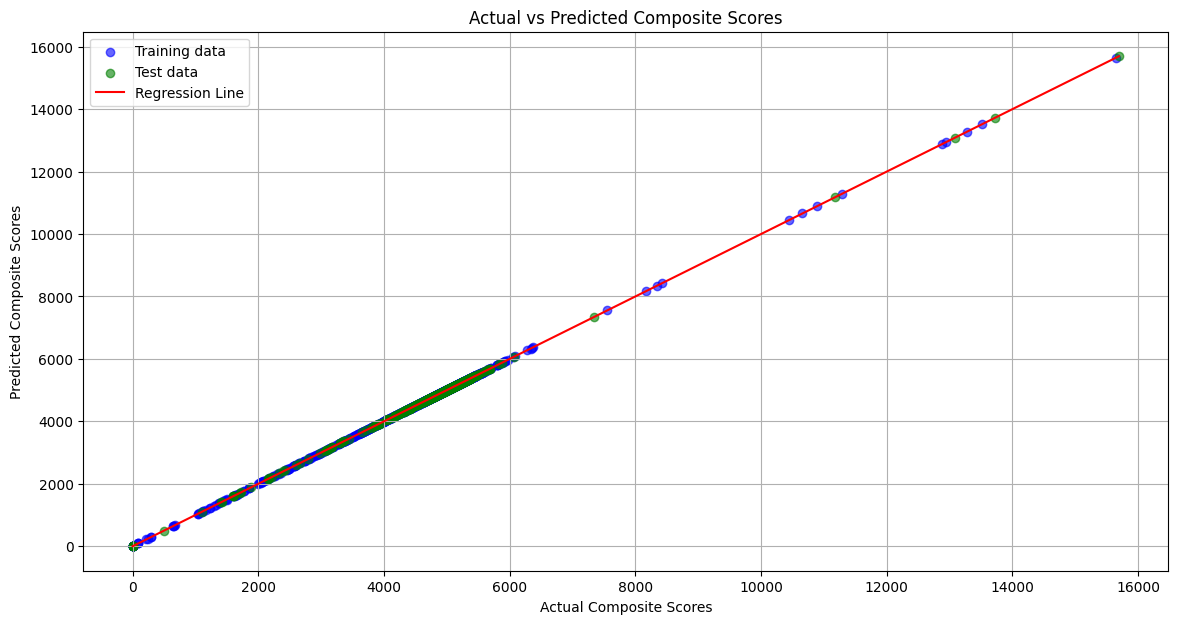

Mean Squared Error: 1.8189507975427564e-24
R-squared: 1.0


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load your composite_scores_df here
# composite_scores_df = pd.read_csv('composite.csv')

# Define the feature matrix and target vector
X = composite_scores_df[['task.index','task_duration'] + [f'{combined_col}_combined' for combined_col, _, _ in skeletal_combinations] + ['shoulder_combined', 'head_combined'] + [f'{metric_name}_avg' for metric_name, _ in engagement_columns]]
y = composite_scores_df['composite_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting the actual vs predicted values for training and test sets
plt.figure(figsize=(14, 7))

# Plot training data
plt.scatter(y_train, y_train_pred, color='blue', label='Training data', alpha=0.6)

# Plot test data
plt.scatter(y_test, y_test_pred, color='green', label='Test data', alpha=0.6)

# Plot perfect prediction line
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Regression Line')

# Adding labels, title, legend, and grid
plt.xlabel('Actual Composite Scores')
plt.ylabel('Predicted Composite Scores')
plt.title('Actual vs Predicted Composite Scores')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Save the model to a file
with open('improve.pkl', 'wb') as file:
    pickle.dump(model, file)




# task recommendation

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os

# Ensure the directory to save images exists
if not os.path.exists('static/participant_graphs'):
    os.makedirs('static/participant_graphs')

# Assuming composite_scores_df and model have already been defined and trained

# Calculate the slope for each participant and determine improvement, decline, or no significant change
slopes = []
participant_status = {'Improvement': 0, 'Decline': 0, 'No Significant Change': 0}

for participant_id, group_data in composite_scores_df.groupby('participant.id'):
    X_participant = group_data[['task.index']].values.reshape(-1, 1)
    y_participant = group_data['composite_score']

    y_pred_participant = model.predict(group_data[['task.index', 'task_duration'] + [f'{combined_col}_combined' for combined_col, _, _ in skeletal_combinations] + ['shoulder_combined', 'head_combined'] + [f'{metric_name}_avg' for metric_name, _ in engagement_columns]])
    slope = np.polyfit(group_data['task.index'], y_pred_participant, 1)[0]
    slopes.append(slope)

    if slope > 0:
        participant_status['Improvement'] += 1
        trend = "improvement"
    elif slope < 0:
        participant_status['Decline'] += 1
        trend = "decline"
    else:
        participant_status['No Significant Change'] += 1
        trend = "no significant change"

    # Plotting the composite score over time for each participant
    plt.figure(figsize=(10, 6))
    plt.plot(group_data['task.index'], group_data['composite_score'], marker='o', label='Composite Score')
    plt.xlabel('Task Index')
    plt.ylabel('Composite Score')
    plt.title(f'Participant {participant_id} - Composite Score by Task Index ({trend})')
    plt.legend()
    plt.grid(True)
    
    # Add trend text to the plot
    plt.text(0.15, 0.95, f'Trend: {trend}', transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))

    # Save the plot to a file
    plot_filename = f'static/participant_graphs/participant_{participant_id}.png'
    plt.savefig(plot_filename)
    
    # Close the plot to avoid displaying it in the notebook
    plt.close()

    print(f'Slope: {slope:.2f} - Plot saved as {plot_filename}')
    plt.show()

Slope: -2.49 - Plot saved as static/participant_graphs/participant_3.png
Slope: 1.64 - Plot saved as static/participant_graphs/participant_4.png
Slope: 8.32 - Plot saved as static/participant_graphs/participant_5.png
Slope: 4.13 - Plot saved as static/participant_graphs/participant_6.png
Slope: 8.42 - Plot saved as static/participant_graphs/participant_8.png
Slope: -17.07 - Plot saved as static/participant_graphs/participant_9.png
Slope: 10.97 - Plot saved as static/participant_graphs/participant_10.png
Slope: -6.97 - Plot saved as static/participant_graphs/participant_11.png
Slope: -2.46 - Plot saved as static/participant_graphs/participant_12.png
Slope: 15.96 - Plot saved as static/participant_graphs/participant_13.png
Slope: -3.60 - Plot saved as static/participant_graphs/participant_14.png
Slope: -23.70 - Plot saved as static/participant_graphs/participant_15.png
Slope: 7.66 - Plot saved as static/participant_graphs/participant_19.png
Slope: 5.29 - Plot saved as static/participant_

In [10]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load your composite_scores_df from the CSV file or your data source
# Example assuming 'composite.csv' contains your data
composite_scores_df = pd.read_csv('composite.csv')

# Step 1: Predict Composite Scores using the saved model

# Load the saved model for predicting composite scores
with open('improve.pkl', 'rb') as file:
    model_improve = pickle.load(file)

# Assuming composite_scores_df already contains the necessary columns:
# 'task_duration', 'task.difficultyLevel'

# Predict composite scores using the loaded model
composite_scores_df['predicted_composite_score'] = model_improve.predict(composite_scores_df[['task.index','task_duration'] + [f'{combined_col}_combined' for combined_col, _, _ in skeletal_combinations] + ['shoulder_combined', 'head_combined'] + [f'{metric_name}_avg' for metric_name, _ in engagement_columns]])

# Step 2: Feature Selection for Task Recommendation

# Select relevant features for task recommendation
X_recommend = composite_scores_df[['participant.ageInMonths','participant.gender','task.index','task_duration', 'task.difficultyLevel', 'predicted_composite_score']]
y_recommend = composite_scores_df['task.ability']

# Step 3: Train a Task Recommendation Model

# Split data into training and testing sets for task recommendation
X_train_rec, X_test_rec, y_train_rec, y_test_rec = train_test_split(X_recommend, y_recommend, test_size=0.2, random_state=42)
#print(X_train_rec.columns)
#print(y_train_rec)
# Train a RandomForestClassifier for task recommendation
model_recommend = RandomForestClassifier(n_estimators=100, random_state=42)
model_recommend.fit(X_train_rec, y_train_rec)



# Step 4: Evaluate the Task Recommendation Model (Optional)

# Predict task abilities on the test set
y_pred_rec = model_recommend.predict(X_test_rec)

# Print evaluation metrics for task recommendation
print("Accuracy:", accuracy_score(y_test_rec, y_pred_rec))
print("\nClassification Report:")
print(classification_report(y_test_rec, y_pred_rec))


_
# Step 5: Make Predictions and Recommend Tasks

# Predict task abilities for all participants
predicted_task_abilities = model_recommend.predict(X_recommend)

# Add predicted task abilities to the dataframe
composite_scores_df['predicted_task_ability'] = predicted_task_abilities

# Filter to get only one task recommendation per participant (highest confidence)
recommended_tasks = composite_scores_df.groupby('participant.id').apply(lambda x: x.loc[x['predicted_composite_score'].idxmax()])

# Display or use the results as needed
print("Participant Recommended Task Abilities:")
print(recommended_tasks[['participant.id', 'predicted_task_ability']])
recommended_tasks.to_csv("recommended_tasks.csv")
# Save the model to a file
with open('recommend.pkl', 'wb') as file:
    pickle.dump(model_recommend, file)


# Save the updated dataframe with predictions
#composite_scores_df.to_csv('composite_with_predictions_and_recommendations.csv', index=False)


Accuracy: 0.792

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.32      0.43        73
           1       0.69      0.61      0.65        51
           2       0.82      0.97      0.89       251

    accuracy                           0.79       375
   macro avg       0.73      0.63      0.65       375
weighted avg       0.77      0.79      0.77       375

Participant Recommended Task Abilities:
                participant.id  predicted_task_ability
participant.id                                        
3                          3.0                     2.0
4                          4.0                     2.0
5                          5.0                     2.0
6                          6.0                     1.0
8                          8.0                     2.0
9                          9.0                     2.0
10                        10.0                     2.0
11                        11.0              

C:\Users\sheeb\AppData\Local\Temp\ipykernel_14500\1276491115.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recommended_tasks = composite_scores_df.groupby('participant.id').apply(lambda x: x.loc[x['predicted_composite_score'].idxmax()])


In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from flask import Flask, request, render_template, send_file,url_for
import io
import os
from sklearn.preprocessing import LabelEncoder

app = Flask(__name__)

# Load the saved model for predicting composite scores (improvement)
with open('improve.pkl', 'rb') as file:
    improve_model = pickle.load(file)

# Load the saved model for task recommendation
with open('recommend.pkl', 'rb') as file:
    recommend_model = pickle.load(file)

# Function to convert time format HH:MM to total minutes
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes
# Load participant IDs from the saved images
def get_participant_ids():
    files = os.listdir('static/participant_graphs')
    participant_ids = [f.split('_')[1].split('.')[0] for f in files if f.startswith('participant')]
    return sorted(participant_ids)

# Route for home page (index.html)
@app.route('/')
def home():
    return render_template('index.html')

# Route for improvement prediction
@app.route('/improvement', methods=['GET','POST'])
def improvement():
    if request.method == 'POST':
        # Get participant details from the form
        participant_name = request.form['participant_name']
        participant_age = int(request.form['participant_age'])
        participant_gender = request.form['participant_gender']
        
        # Get the session details from the form
        task_index = list(range(1, len(request.form.getlist('task_duration')) + 1))
        # Convert task_duration from HH:MM to numeric (total minutes)
        task_duration = []
        for time_str in request.form.getlist('task_duration'):
            if ':' in time_str:
                h, m = map(int, time_str.split(':'))
                total_minutes = h * 60 + m
                task_duration.append(total_minutes)
            else:
                task_duration.append(int(time_str)) 
        elbow_combined = request.form.getlist('elbow_combined', type=float)
        hand_combined = request.form.getlist('hand_combined', type=float)
        wrist_combined = request.form.getlist('wrist_combined', type=float)
        shoulder_combined = request.form.getlist('shoulder_combined', type=float)
        head_combined = request.form.getlist('head_combined', type=float)
        eye_gaze_avg = request.form.getlist('eye_gaze_avg', type=float)
        head_gaze_avg = request.form.getlist('head_gaze_avg', type=float)
    
        # Create DataFrame from the session details
        participant_sessions = pd.DataFrame({
            'task.index': task_index,
            'task_duration': task_duration,
            'elbow_combined': elbow_combined,
            'hand_combined': hand_combined,
            'wrist_combined': wrist_combined,
            'shoulder_combined': shoulder_combined,
            'head_combined': head_combined,
            'eye_gaze_avg': eye_gaze_avg,
            'head_gaze_avg': head_gaze_avg
        })
    
        # Define the feature columns
        feature_cols = [
            'task.index', 'task_duration', 'elbow_combined', 'hand_combined',
            'wrist_combined', 'shoulder_combined', 'head_combined',
            'eye_gaze_avg', 'head_gaze_avg'
        ]
    
        # Predict composite scores for the provided session details
        participant_sessions['predicted_composite_score'] = improve_model.predict(participant_sessions[feature_cols])
    
        # Calculate the slope of the trend line
        slope = np.polyfit(participant_sessions['task.index'], participant_sessions['predicted_composite_score'], 1)[0]
    
        # Determine the trend
        if slope > 0:
            trend = "improvement"
        elif slope < 0:
            trend = "decline"
        else:
            trend = "no significant change"
    
        # Plotting the composite score over time for the participant
        plt.figure(figsize=(10, 6))
        plt.plot(participant_sessions['task.index'], participant_sessions['predicted_composite_score'], marker='o', label='Predicted Composite Score')
        plt.xlabel('Task Index')
        plt.ylabel('Composite Score')
        plt.title(f'Participant - Composite Score by Task Index ({trend})')
        plt.legend()
        plt.grid(True)
    
        # Add trend and slope text to the plot
        plt.text(0.15, 0.95, f'Trend: {trend}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))
        plt.text(0.15, 0.85, f'Slope: {slope:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))
    
        # Save main plot to a temporary file
        main_plot_path = os.path.join('static', 'main_plot.png')
        plt.savefig(main_plot_path)
        plt.close()
    
        # Displaying individual plots for each feature
        feature_plot_paths = {}
        for feature in ['eye_gaze_avg', 'head_gaze_avg', 'elbow_combined', 'hand_combined', 'wrist_combined', 'shoulder_combined', 'head_combined']:
            plt.figure(figsize=(8, 5))
            plt.plot(participant_sessions['task.index'], participant_sessions[feature], marker='o')
            plt.xlabel('Task Index')
            plt.ylabel(feature.replace('_', ' ').title())
            plt.title(f'Participant - {feature.replace("_", " ").title()} by Task Index')
            plt.grid(True)
            plt.tight_layout()
    
            # Save each feature plot to a temporary file
            feature_plot_path = os.path.join('static', f'{feature}_plot.png')
            plt.savefig(feature_plot_path)
            plt.close()

            # Store the path for each feature plot
            feature_plot_paths[feature] = feature_plot_path
    
        # Render the result template with the participant's information and visualization
        return render_template('impres.html', name=participant_name, age=participant_age, gender=participant_gender, trend=trend, slope=slope, main_plot_url=main_plot_path, feature_plots=feature_plot_paths)
    # If GET request, render the form template
    return render_template('improve.html')

# Route for task recommendation
@app.route('/task', methods=['GET','POST'])
def task():
    if request.method == 'POST':
        # Retrieve participant details from the form
        participant_name = request.form['participant_name']
        participant_age_years = int(request.form['participant_age'])
        participant_gender = request.form['participant_gender'].lower()

        # Convert age from years to months
        participant_age_months = participant_age_years * 12
    
        # Map gender to numeric values (assuming 0 for male, 1 for female)
        gender_map = {'male': 0, 'female': 1}
        participant_gender_num = gender_map.get(participant_gender, 2)
    
        # Convert age from years to months
        participant_age_months = participant_age_years * 12
    
        # Parse session-specific details
        task_index = list(range(1, len(request.form.getlist('task_duration')) + 1))
        task_duration = [time_to_minutes(time) for time in request.form.getlist('task_duration')]
        elbow_combined = request.form.getlist('elbow_combined', type=float)
        hand_combined = request.form.getlist('hand_combined', type=float)
        wrist_combined = request.form.getlist('wrist_combined', type=float)
        shoulder_combined = request.form.getlist('shoulder_combined', type=float)
        head_combined = request.form.getlist('head_combined', type=float)
        eye_gaze_avg = request.form.getlist('eye_gaze_avg', type=float)
        head_gaze_avg = request.form.getlist('head_gaze_avg', type=float)
        task_difficulty = request.form.getlist('task_difficulty', type=int)
    
        num_sessions = len(task_index)
    
        # Create a DataFrame with all the session details and repeat participant details
        participant_sessions = pd.DataFrame({
            'task.index': task_index,
            'task_duration': task_duration,
            'elbow_combined': elbow_combined,
            'hand_combined': hand_combined,
            'wrist_combined': wrist_combined,
            'shoulder_combined': shoulder_combined,
            'head_combined': head_combined,
            'eye_gaze_avg': eye_gaze_avg,
            'head_gaze_avg': head_gaze_avg,
            'task.difficultyLevel': task_difficulty,
            'participant.ageInMonths': [participant_age_months] * num_sessions,
            'participant.gender': [participant_gender_num] * num_sessions
        })
    
        # Define the feature columns for composite score prediction
        composite_feature_cols = [
            'task.index', 'task_duration', 'elbow_combined', 'hand_combined',
            'wrist_combined', 'shoulder_combined', 'head_combined',
            'eye_gaze_avg', 'head_gaze_avg'
        ]

        # Predict composite scores for the provided session details
        participant_sessions['predicted_composite_score'] = improve_model.predict(participant_sessions[composite_feature_cols])
    
        # Determine the trend
        slope = np.polyfit(participant_sessions['task.index'], participant_sessions['predicted_composite_score'], 1)[0]
        if slope > 0:
            trend = "improvement"
        elif slope < 0:
            trend = "decline"
        else:
            trend = "no significant change"
    
        # Define the feature columns for task recommendation
        task_feature_cols = [
            'participant.ageInMonths', 'participant.gender',
            'task.index', 'task_duration', 'task.difficultyLevel',
            'predicted_composite_score'
        ]
    
        # Use the task model to predict the best task ability for each session
        predicted_task_abilities = recommend_model.predict(participant_sessions[task_feature_cols])
    
        # Add predicted task abilities to the DataFrame
        participant_sessions['predicted_task_ability'] = predicted_task_abilities
    
        # Get the most recommended task ability for the participant
        recommended_task = participant_sessions['predicted_task_ability'].mode()[0]
    
        # Determine the task description based on the recommended task
        task_descriptions = {
            0: "Imitation (IM) is a foundational skill for social and cognitive development. For individuals with ASD, imitation skills can help in understanding and learning from others, improving communication and social interaction.",
            1: "Joint Attention (JA) is critical for social development. It involves shared focus on an object or activity, promoting social connection and communication. For individuals with ASD, enhancing joint attention can significantly improve social interactions.",
            2: "Turn Taking (TT) is essential for effective communication and social interaction. It teaches patience and reciprocity, which are vital for social engagement. For individuals with ASD, developing turn-taking skills can lead to better social and conversational abilities."
        }
        task_description = task_descriptions.get(recommended_task, "No description available for this task.")
    
        # Plotting the composite score over time for the participant
        plt.figure(figsize=(10, 6))
        plt.plot(participant_sessions['task.index'], participant_sessions['predicted_composite_score'], marker='o', label='Predicted Composite Score')
        plt.xlabel('Task Index')
        plt.ylabel('Composite Score')
        plt.title(f'Participant - Composite Score by Task Index ({trend})')
        plt.legend()
        plt.grid(True)

        # Save plot to a file
        plot_path = os.path.join('static', 'plot.png')
        plt.savefig(plot_path)
        plt.close()
    
        # Render the result template with the participant's information and visualization
        return render_template('taskres.html', name=participant_name, age=participant_age_years, gender=participant_gender, trend=trend,  task_description=task_description, plot_url=plot_path)
    # If GET request, render the form template
    return render_template('task.html')
    
@app.route('/train', methods=['GET','POST'])
def train():
    if request.method == 'POST':
        # Load the dataset
        data = pd.read_csv('autismfile.csv')

        # List of columns to be label encoded
        categorical_columns = ['condition', 'participant.gender', 'task.ability', 'task.difficultyLevel']

        # Initialize the LabelEncoder
        label_encoder = LabelEncoder()

        # Apply label encoding to each column
        for column in categorical_columns:
            data[column] = label_encoder.fit_transform(data[column])

        # Count initial participants
        initial_participant_count = data['participant.id'].nunique()

        # Session counts
        session_counts = data['participant.id'].value_counts().sort_index()

        # Plot initial session counts
        fig, ax = plt.subplots()
        session_counts.plot(kind='bar', ax=ax)
        ax.set_title('Number of Sessions for Each Participant (Initial)')
        ax.set_xlabel('Participant ID')
        ax.set_ylabel('Number of Sessions')
        plt_path_initial = os.path.join('static', 'images', 'initial_sessions.png')
        plt.savefig(plt_path_initial)
        plt.close()

        # Filter participants with at least 30 sessions
        eligible_participants = session_counts[session_counts >= 30].index
        filtered_data = data[data['participant.id'].isin(eligible_participants)]

        # Keep only the first 30 sessions for each participant
        filtered_data = filtered_data.groupby('participant.id').head(30)

        # Sort the DataFrame by participant ID
        filtered_data = filtered_data.sort_values(by='participant.id')

        # Count filtered participants
        filtered_participant_count = filtered_data['participant.id'].nunique()

        filtered_session_counts = filtered_data['participant.id'].value_counts().sort_index()

        # Plot filtered session counts
        fig, ax = plt.subplots()
        filtered_session_counts.plot(kind='bar', ax=ax)
        ax.set_title('Number of Sessions for Each Participant (Filtered)')
        ax.set_xlabel('Participant ID')
        ax.set_ylabel('Number of Sessions')
        plt_path_filtered = os.path.join('static', 'images', 'filtered_sessions.png')
        plt.savefig(plt_path_filtered)
        plt.close()

        # Save the filtered DataFrame to a CSV file
        filtered_csv_path = 'filtered_autismfile.csv'
        filtered_data.to_csv(filtered_csv_path, index=False)

        return render_template('trainres.html',
                               initial_participant_count=initial_participant_count,
                               filtered_participant_count=filtered_participant_count,
                               plt_path_initial=plt_path_initial,
                               plt_path_filtered=plt_path_filtered)
    return render_template('train.html')

       
@app.route('/show_graph', methods=['GET','POST'])
def show_graph():
    if request.method == 'POST':
        
        participant_id = request.form['participant_id']
        graph_url = url_for('static', filename=f'participant_graphs/participant_{participant_id}.png')
        return render_template('indextrain.html', participant_id=participant_id, graph_url=graph_url, participant_ids=get_participant_ids())
    
    participant_ids = get_participant_ids()
    return render_template('progress.html', participant_ids=participant_ids)

# Load recommended tasks from CSV
recommended_tasks_df = pd.read_csv('recommended_tasks.csv')

@app.route('/ability', methods=['GET', 'POST'])
def ability():
    if request.method == 'POST':
        participant_id = int(request.form['participant_id'])
        
        # Retrieve recommended task for the selected participant
        participant_task = recommended_tasks_df[recommended_tasks_df['participant.id'] == participant_id]['predicted_task_ability'].values[0]
        
        participant_ids = sorted(recommended_tasks_df['participant.id'].unique())
        return render_template('indextask.html', participant_ids=participant_ids, participant_task=participant_task, selected_participant_id=participant_id)
    
    participant_ids = sorted(recommended_tasks_df['participant.id'].unique())
    return render_template('indextask.html', participant_ids=participant_ids)

if __name__ == '__main__':
    
    app.run()




 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Jun/2024 17:14:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Jun/2024 17:14:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Jun/2024 17:14:08] "GET /assets/vendor/animate.css/animate.min.css HTTP/1.1" 404 -
127.0.0.1 - - [28/Jun/2024 17:14:08] "GET /assets/vendor/aos/aos.css HTTP/1.1" 404 -
127.0.0.1 - - [28/Jun/2024 17:14:08] "GET /assets/vendor/bootstrap/css/bootstrap.min.css HTTP/1.1" 404 -
127.0.0.1 - - [28/Jun/2024 17:14:08] "GET /assets/vendor/bootstrap-icons/bootstrap-icons.css HTTP/1.1" 404 -
127.0.0.1 - - [28/Jun/2024 17:14:08] "GET /assets/vendor/boxicons/css/boxicons.min.css HTTP/1.1" 404 -
127.0.0.1 - - [28/Jun/2024 17:14:08] "GET /assets/vendor/glightbox/css/glightbox.min.css HTTP/1.1" 404 -
127.0.0.1 - - [28/Jun/2024 17:14:08] "GET /assets/vendor/remixicon/remixicon.css HTTP/1.1" 404 -
127.0.0.1 - - [28/Jun/2024 17:14:08] "GET /assets/vendor/swiper/swiper-bundle.min.css HTTP/1.1" 404 -
127.0.0.1 - - [2